In [3]:
# !pip install numpy
# !pip install scikit-learn
# !pip install tensorflow
# !pip install matplotlib
# !pip install seaborn
# !pip install xgboost
# !pip install keras==2.12.0 
# !pip install tensorflow==2.12.0
# !pip install scikeras
# !pip install lightgbm
# !pip install catboost

In [4]:
# Core Libraries
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', 0)
import random
import time

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline

# Statistical Tests
from scipy import stats
from scipy.stats import shapiro, anderson, kstest

# Models
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.inspection import permutation_importance
import torch
import torch.nn as nn

# Metrics and Visualization
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Deactivate warnings
import warnings
warnings.filterwarnings("ignore")

Start timer

In [5]:
start_time=time.time()

# Transform and Read Data

In [6]:
data_lines = in_sample_string.splitlines()
header = data_lines[0].split(",")
data_rows = [line.split(",") for line in data_lines[1:]]
in_sample = pd.DataFrame(data_rows, columns=header)

data_lines = out_of_sample_string.splitlines()
header = data_lines[0].split(",")
data_rows = [line.split(",") for line in data_lines[1:]]
out_of_sample = pd.DataFrame(data_rows, columns=header)

In [7]:
print(in_sample.head())
print(out_of_sample.head())
print(in_sample.shape)
print(out_of_sample.shape)
print(type(in_sample.iloc[1,1]))
in_sample=in_sample.astype(float)
out_of_sample=out_of_sample.astype(float)

              feature_1            feature_2            feature_3  \
0  -0.3302408821816424   0.17331518012466218  -0.9214218900136055   
1  -0.21749896198961055  0.20997123115977778  -0.8163534680354095   
2  -0.1077386414013847   0.2356660025017262   -0.69426818602704     
3  -0.03699064701050615  0.24547491515973036  -0.5724493570714944   
4  -0.07616923350966448  0.2205382734241303   -0.5140052817811214   

            feature_4             feature_5           feature_6  \
0  0.7094594594594594  -0.30723602309001063  2.8992328482565015   
1  0.8868243243243243  -0.24295561959350165  2.51863163380338     
2  0.9611486486486487  -0.1788250598847329   10.166424411801868   
3  0.9763513513513513  -0.17396147238414375  30.85136994848145    
4  0.964527027027027   -0.1894500861554826   4.7091792715609975   

             feature_7           feature_8              feature_9  \
0  -1.7518115222284891  0.6604346203405467  0.0016288067531956465   
1  -1.3196960791656445  0.6657119433676871  

# Visual Inspection

In Sample


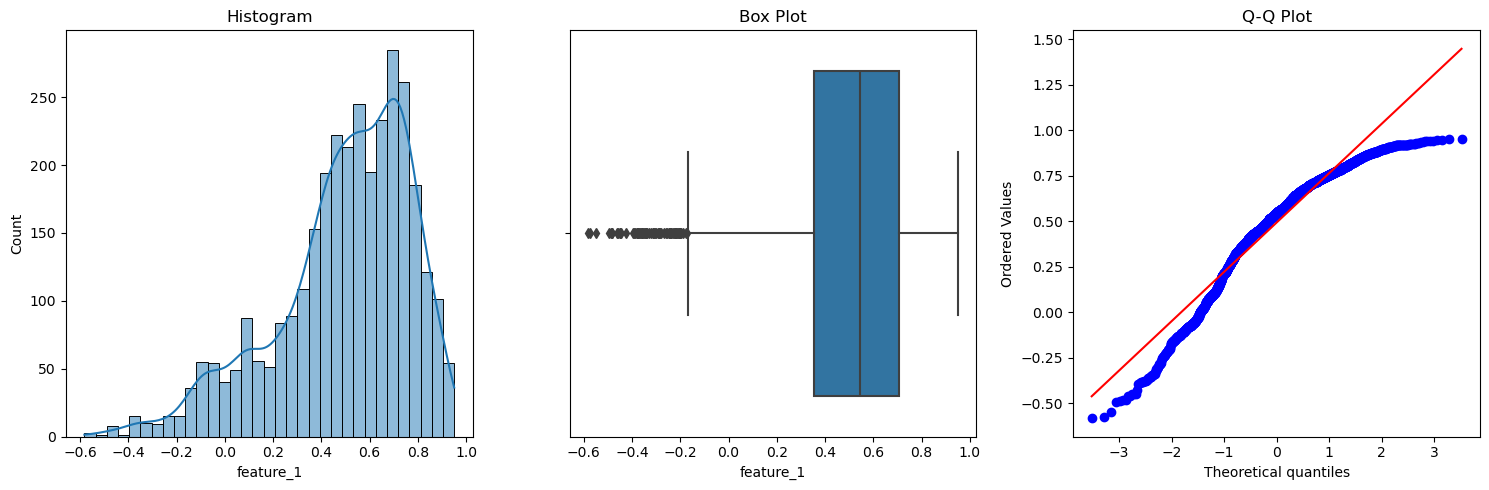

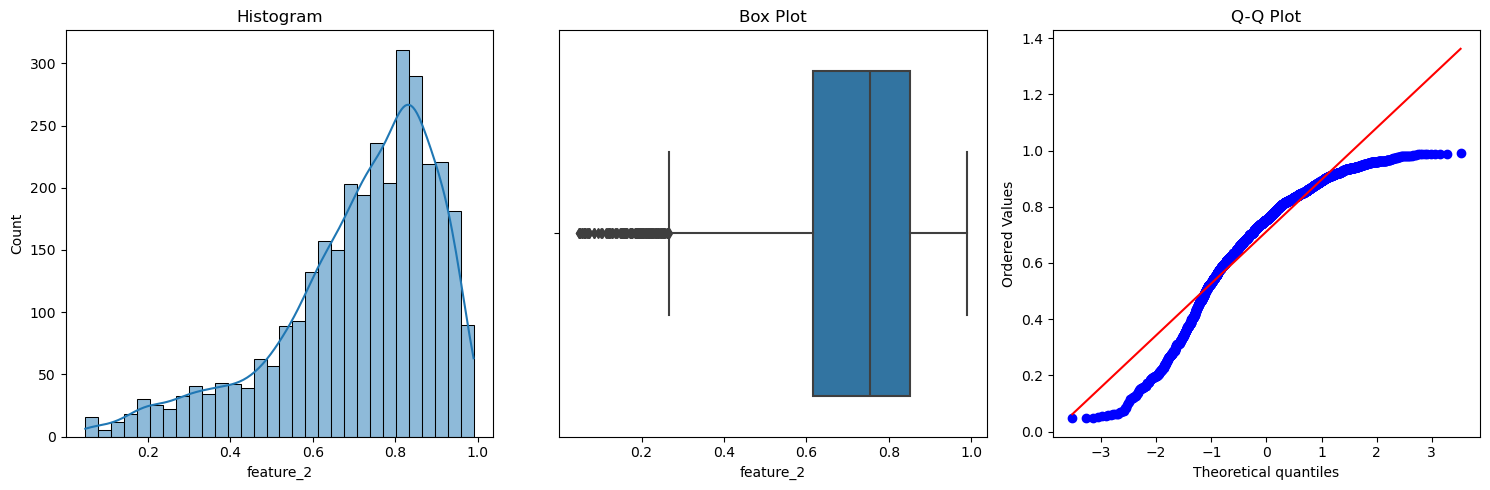

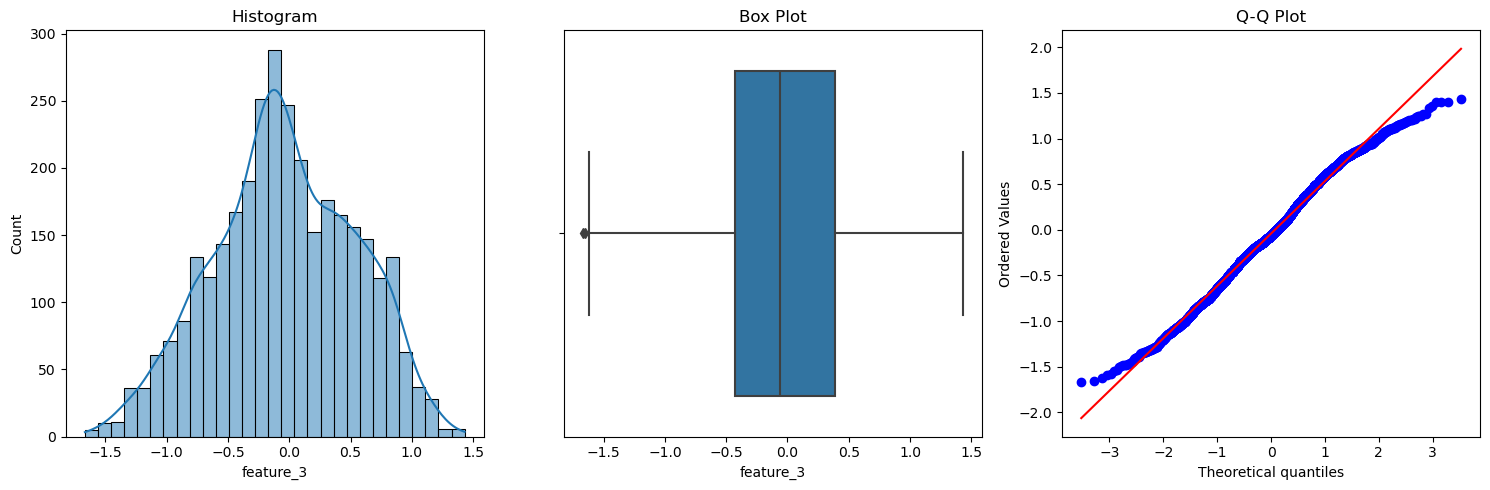

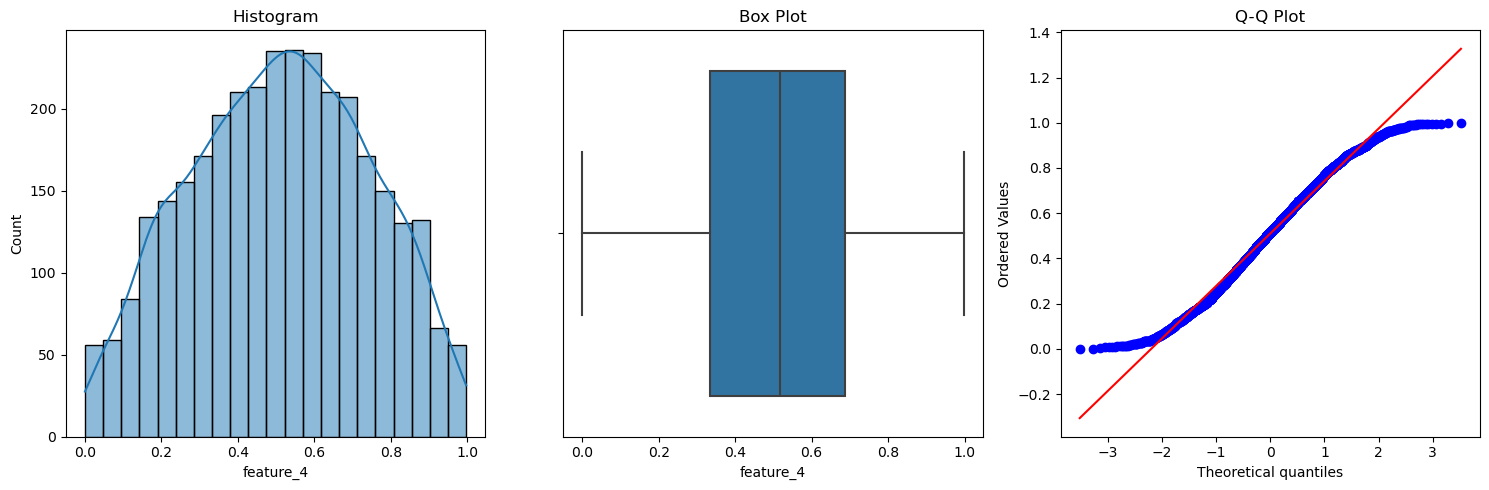

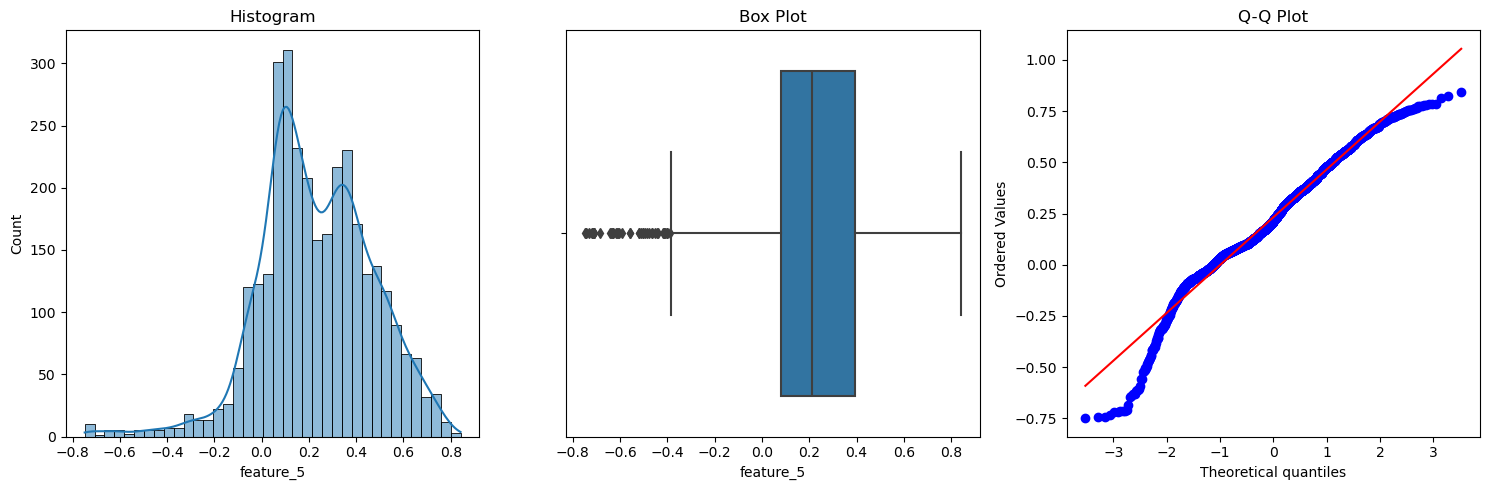

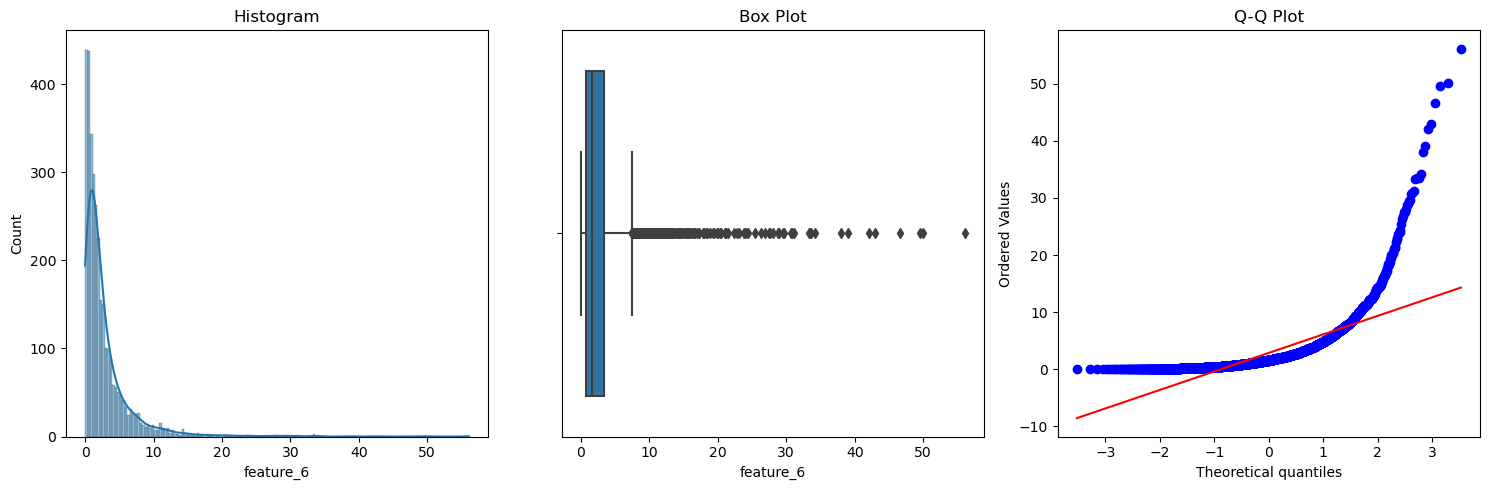

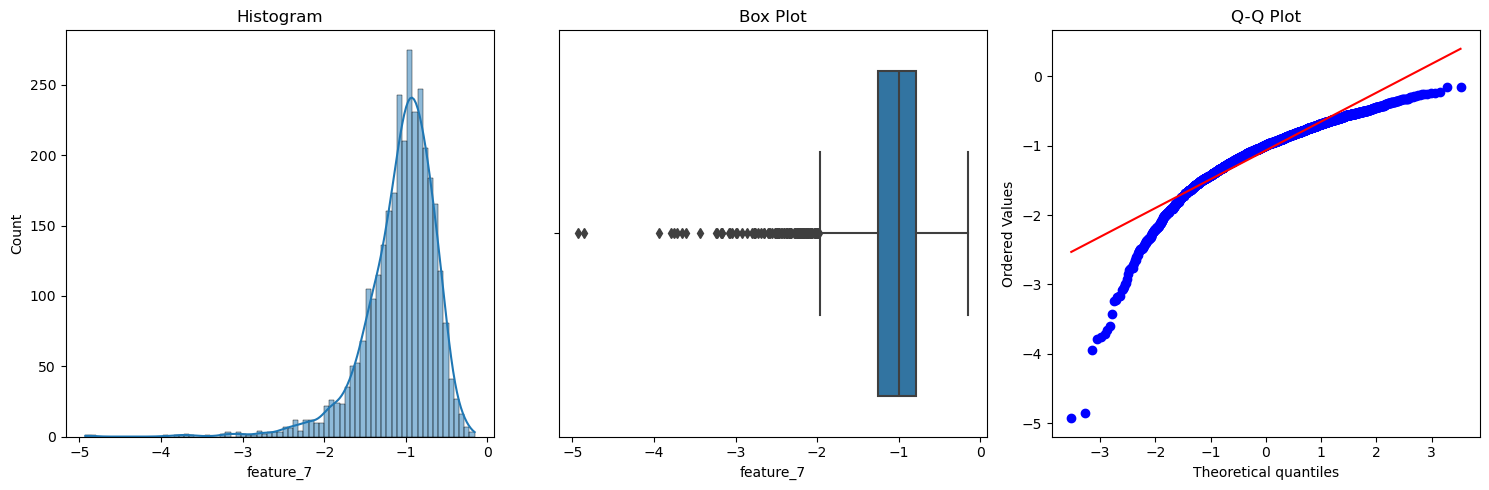

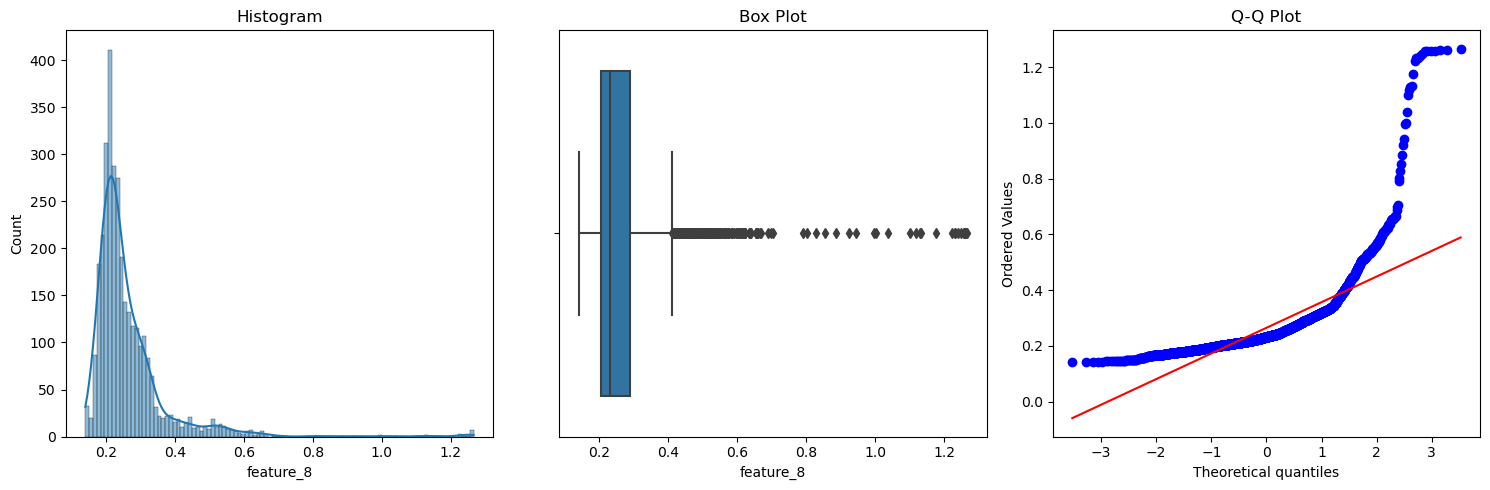

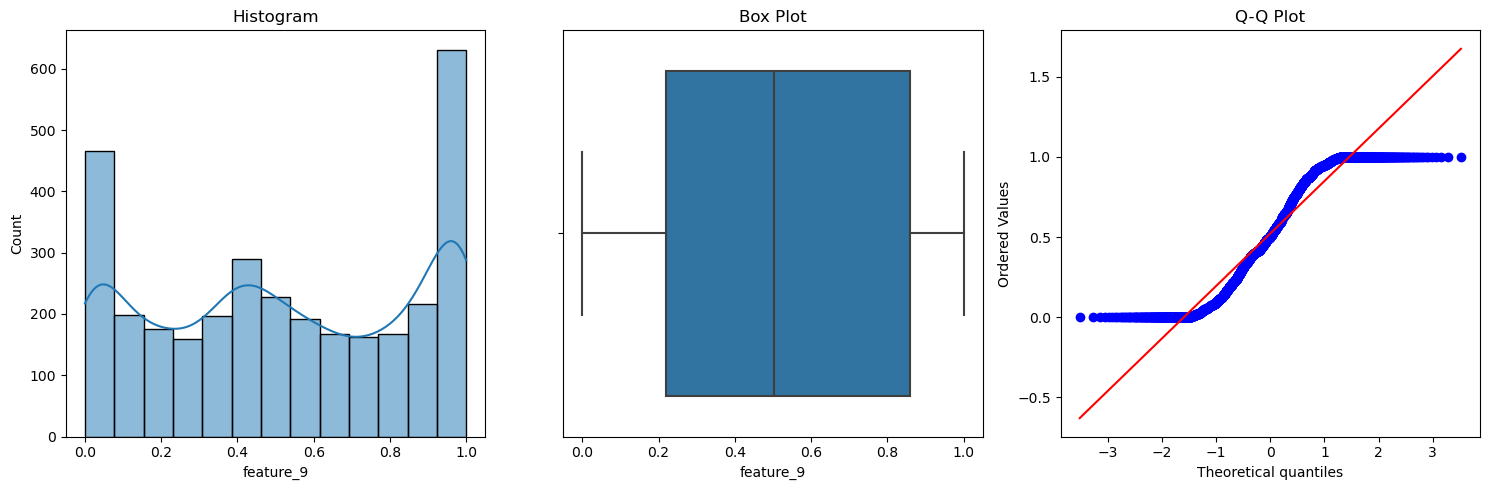

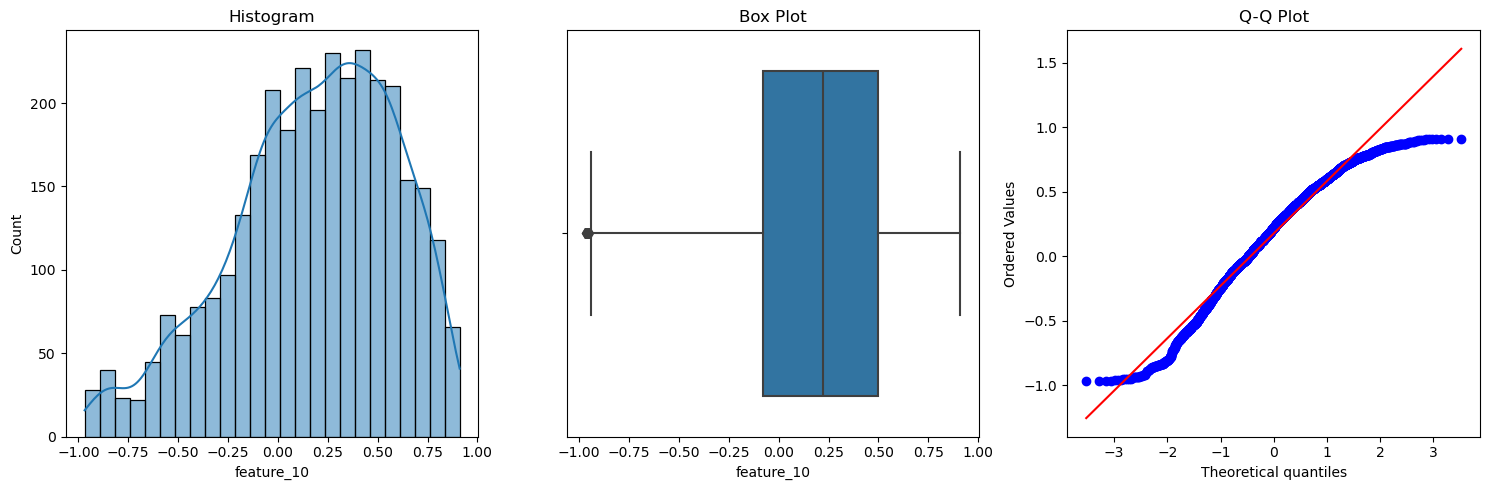

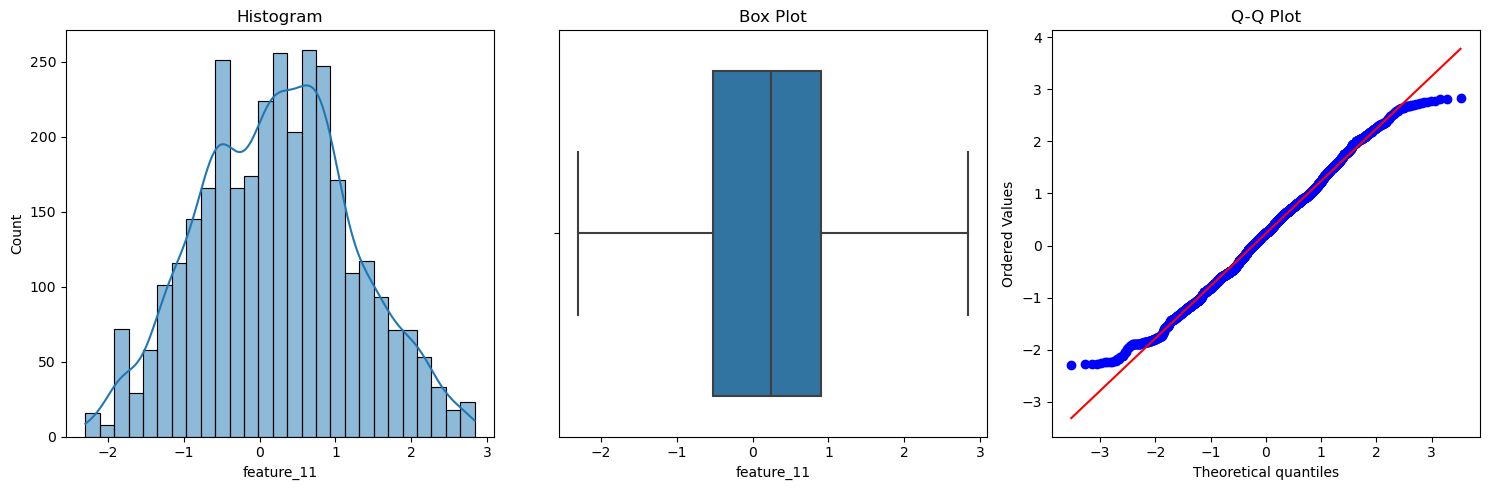

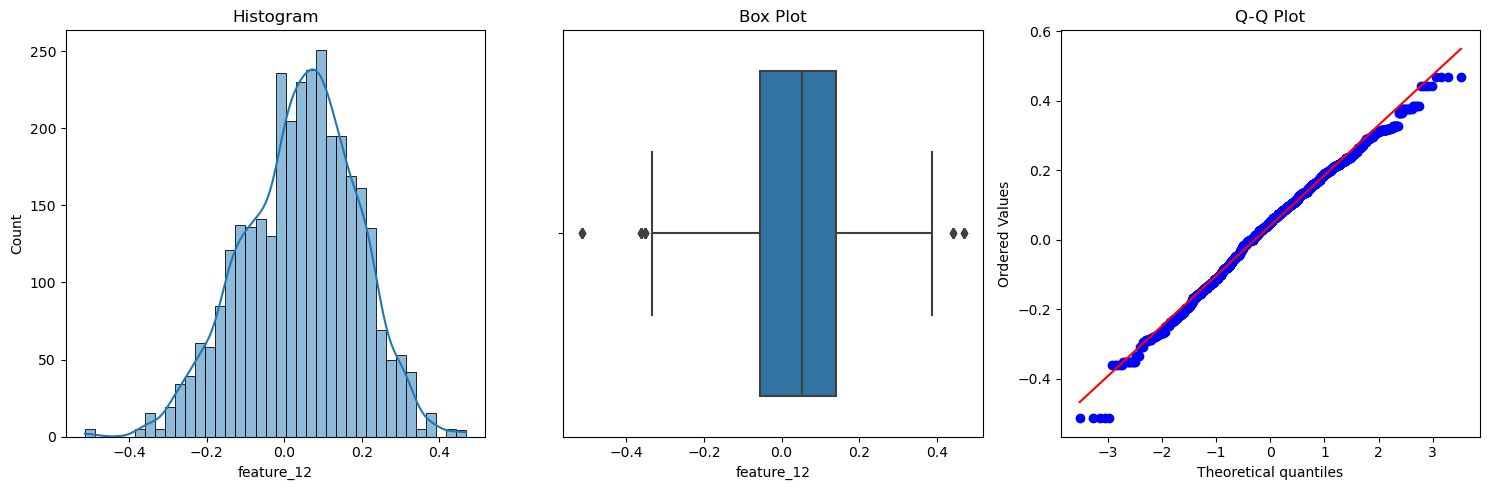

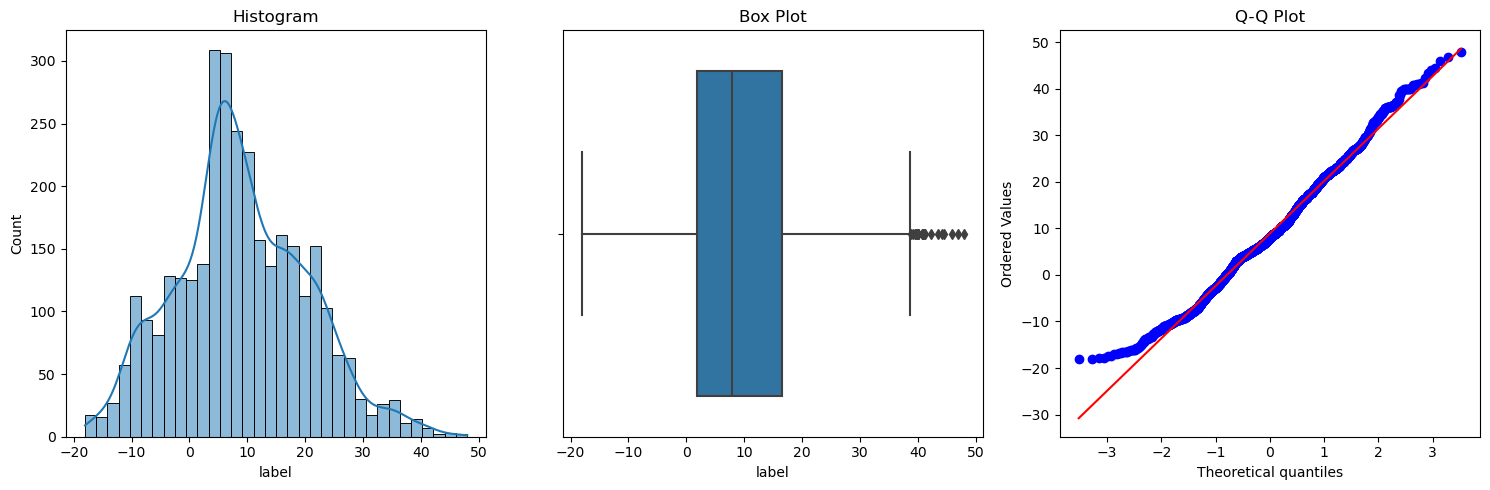



 Out of Sample


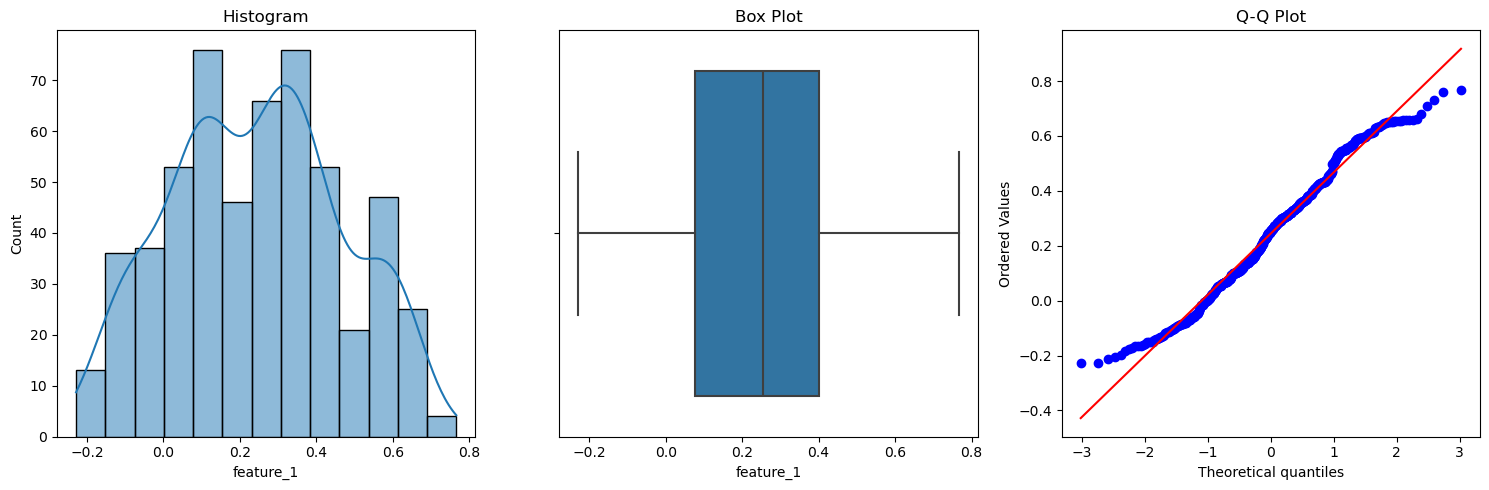

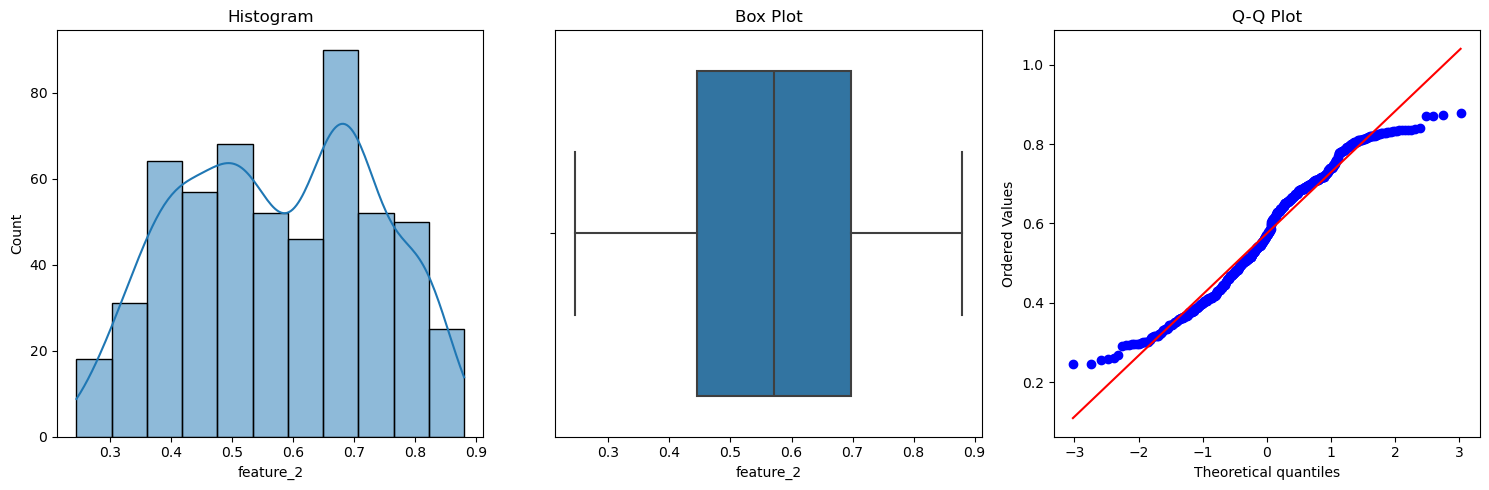

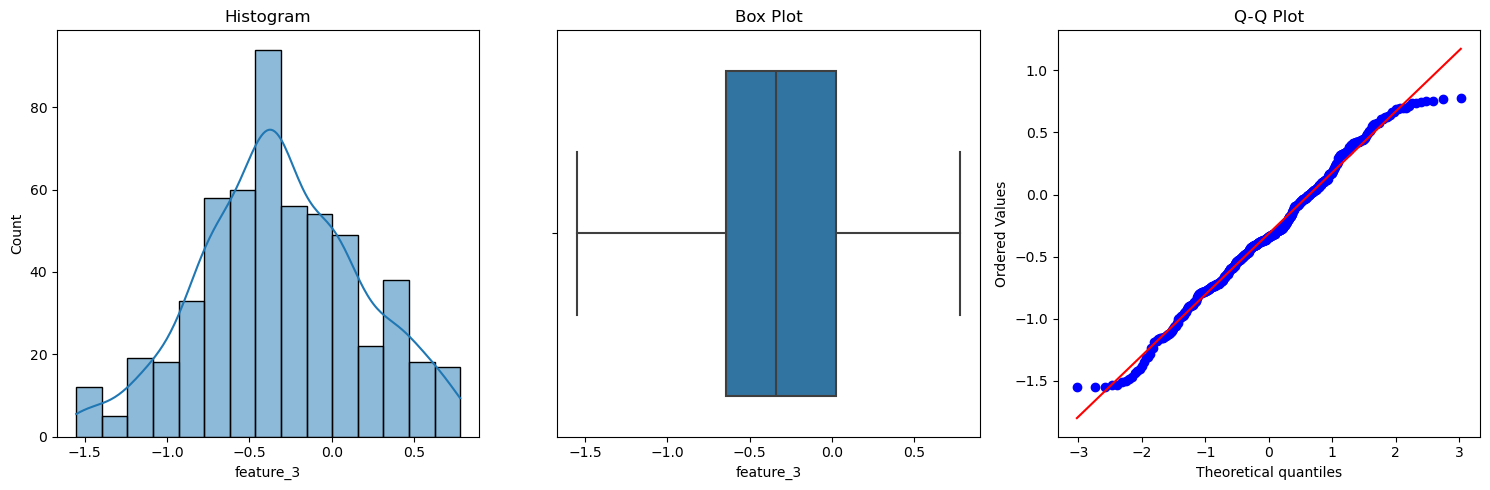

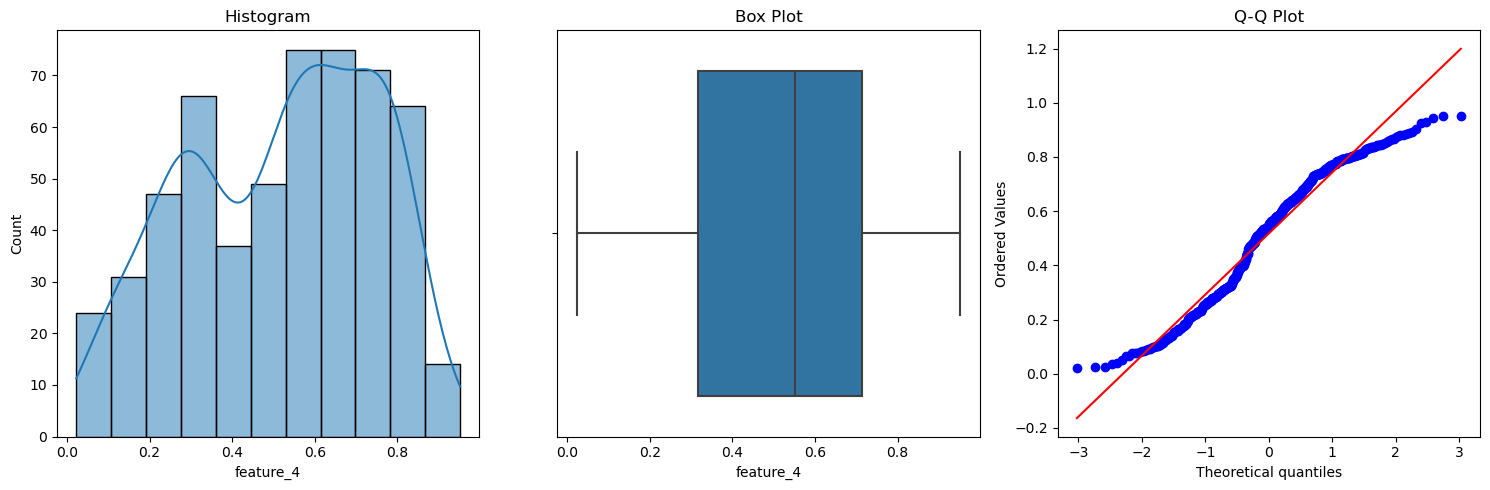

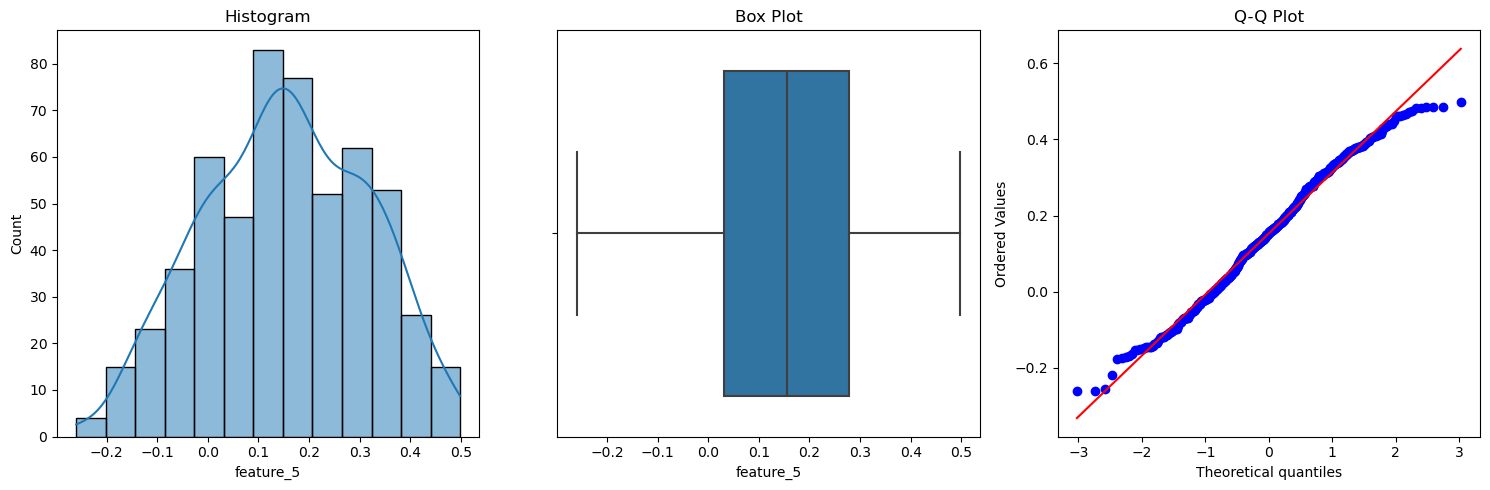

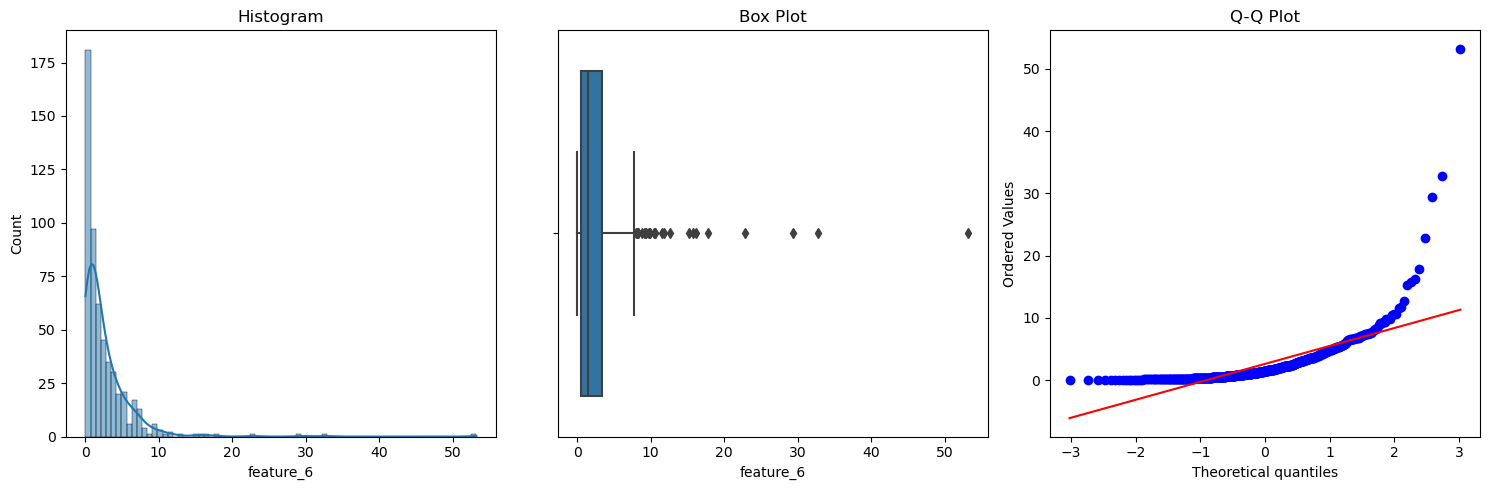

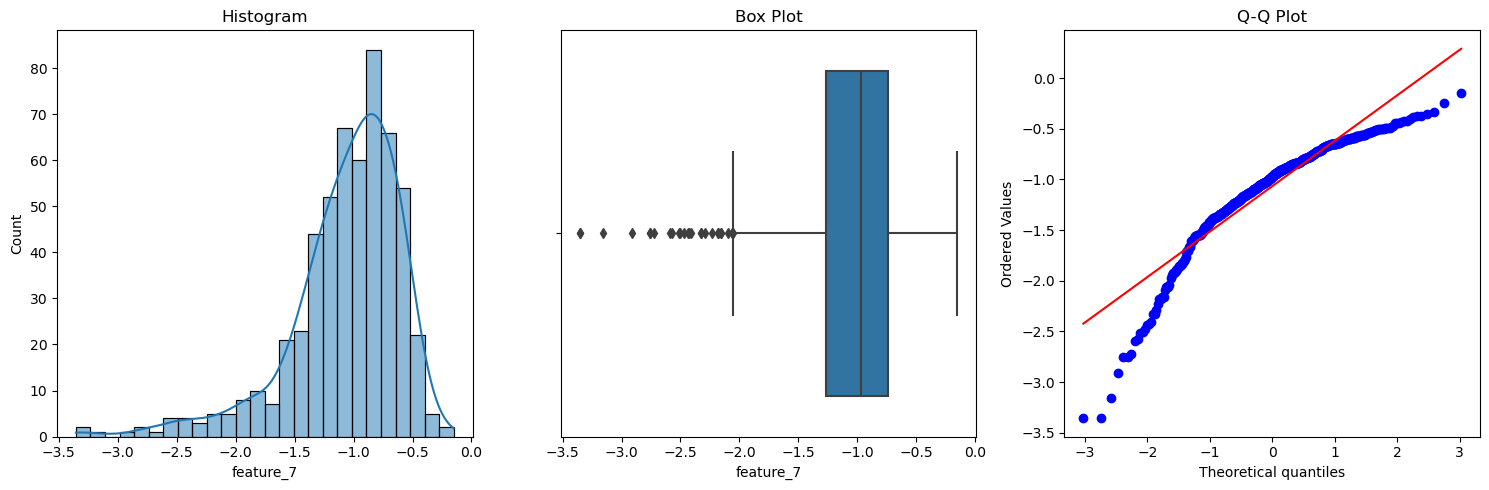

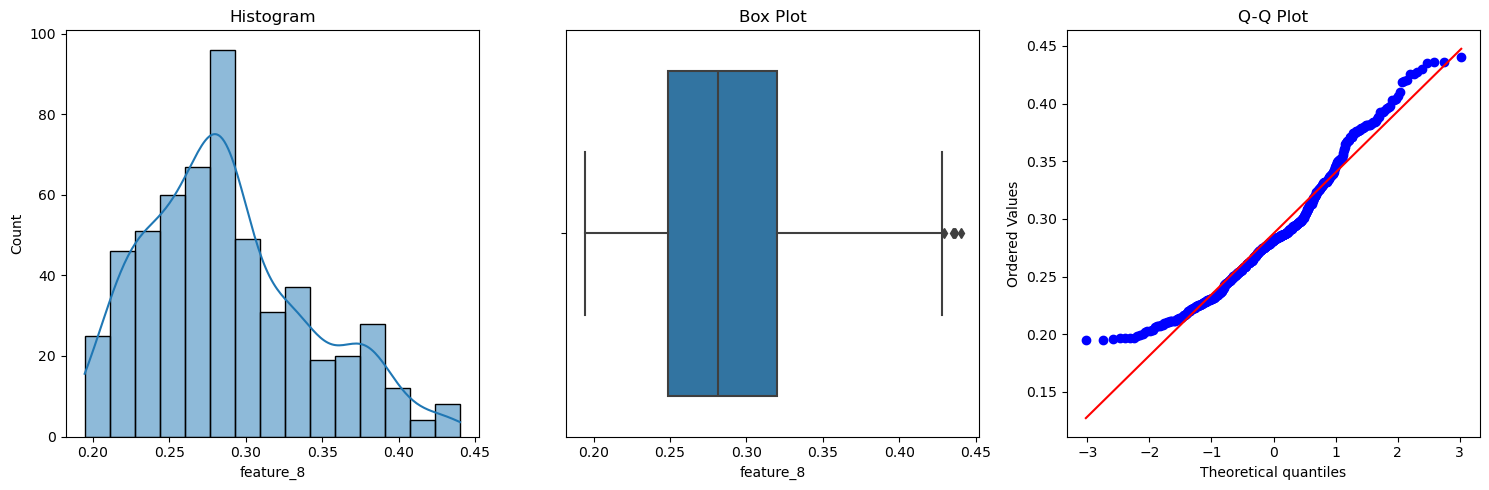

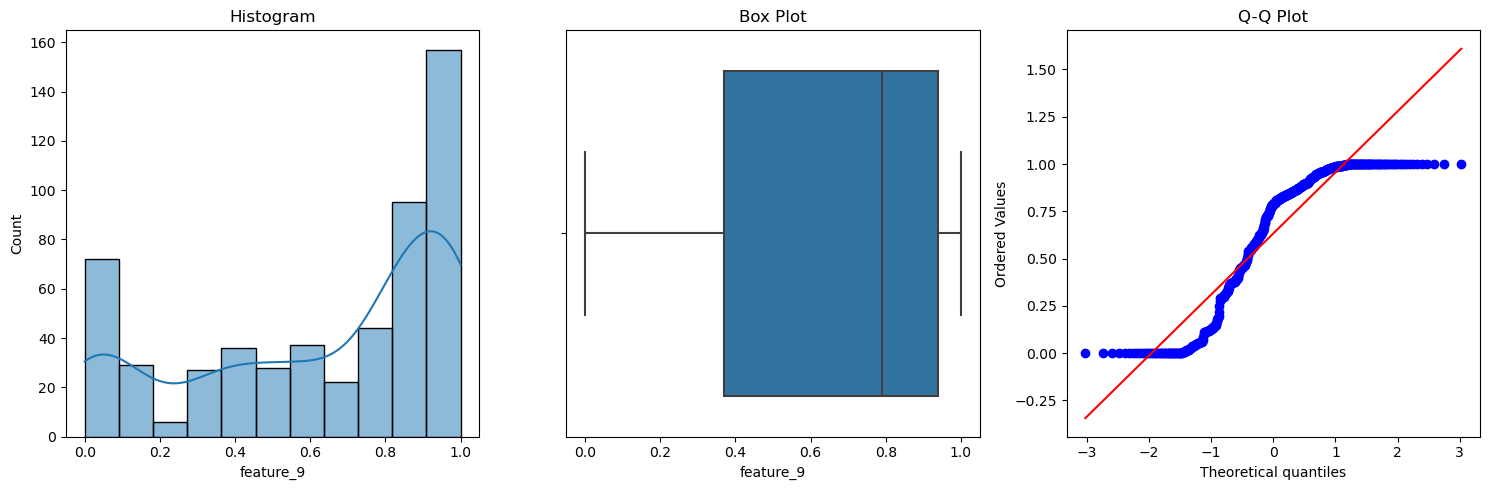

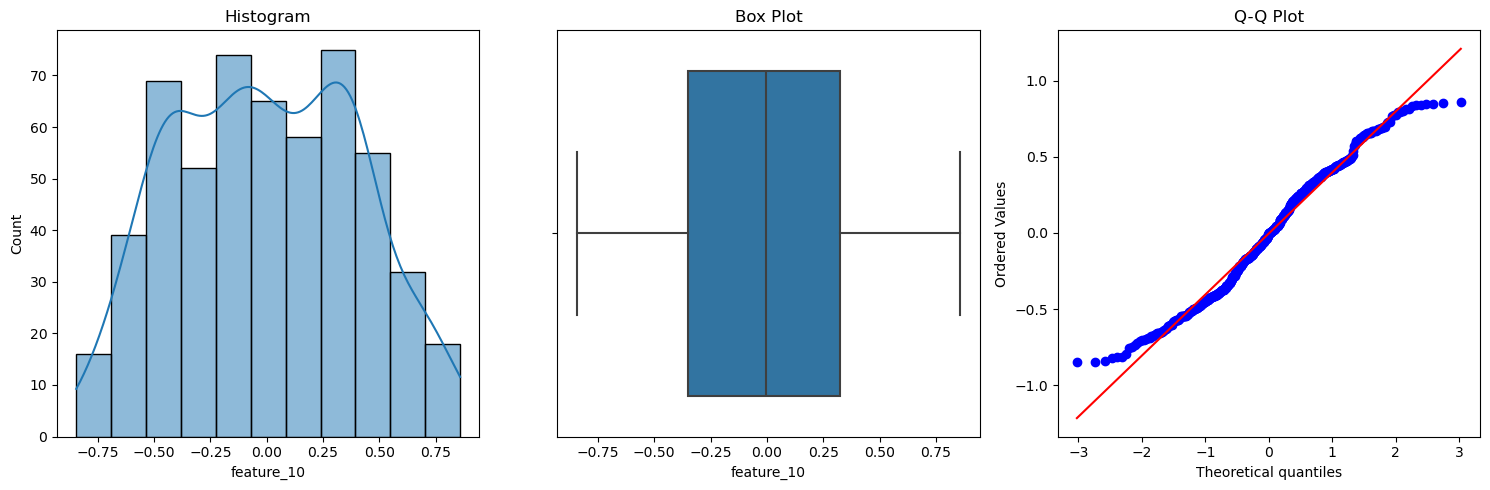

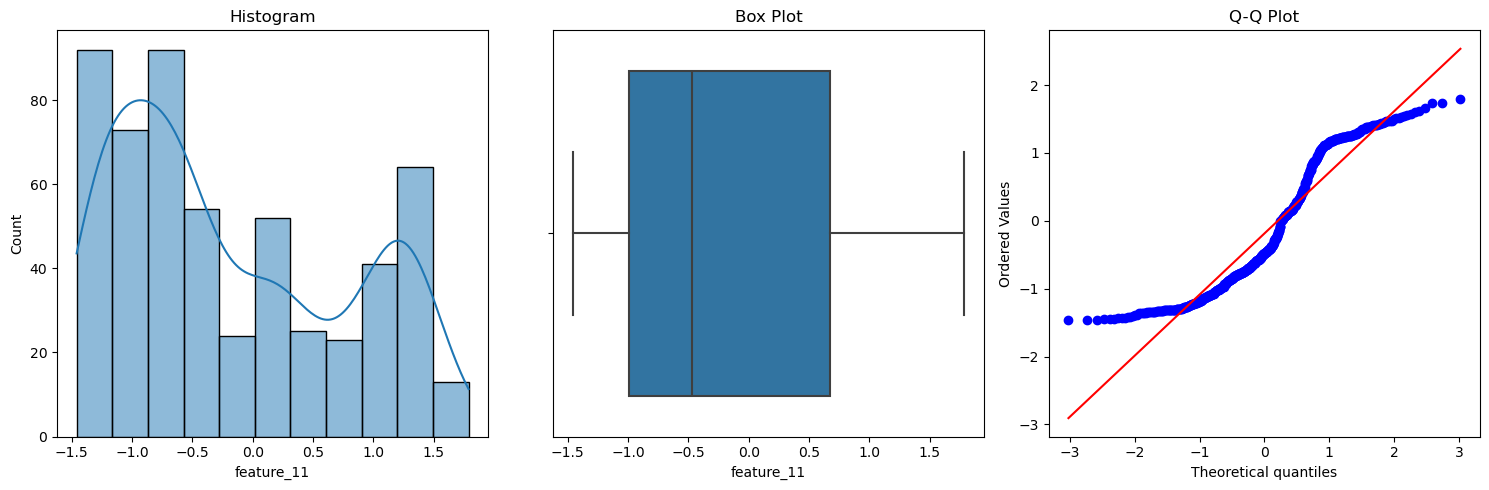

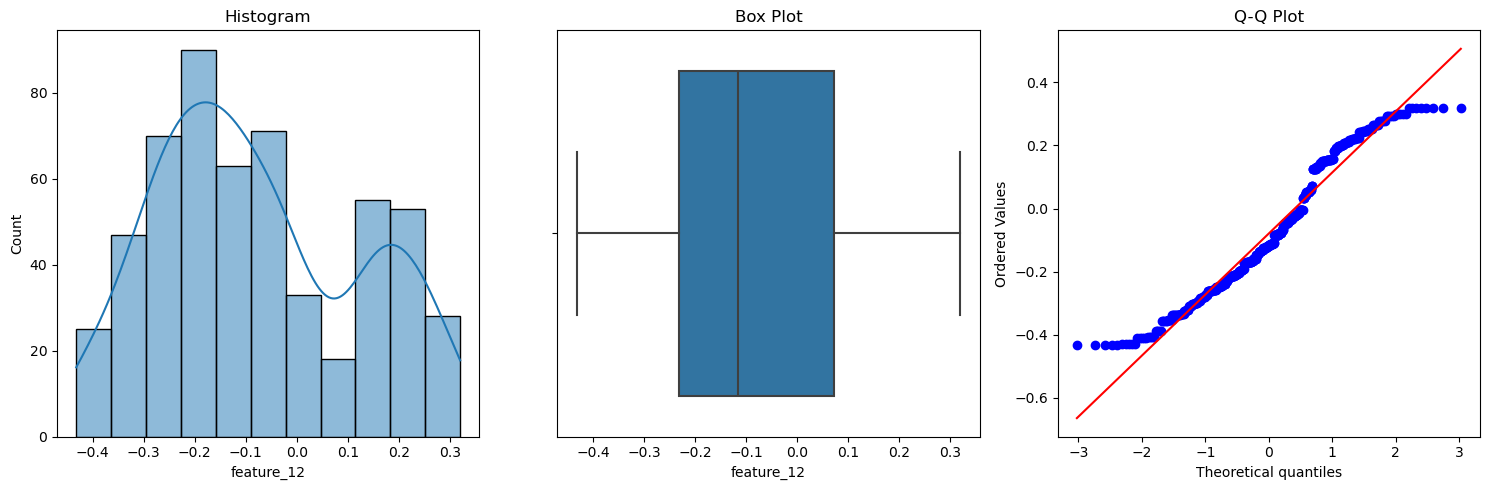

In [8]:
def visual_inspection(df):
    for column in df.columns:
        plt.figure(figsize=(15, 5))

        # Histogram
        plt.subplot(1, 3, 1)
        sns.histplot(df[column], kde=True)
        plt.title('Histogram')

        # Box Plot
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[column])
        plt.title('Box Plot')

        # Q-Q Plot
        plt.subplot(1, 3, 3)
        stats.probplot(df[column], dist="norm", plot=plt)
        plt.title('Q-Q Plot')

        plt.tight_layout()
        plt.show()
print("In Sample")
visual_inspection(in_sample)
print("\n\n Out of Sample")
visual_inspection(out_of_sample)

# Missing Values Check

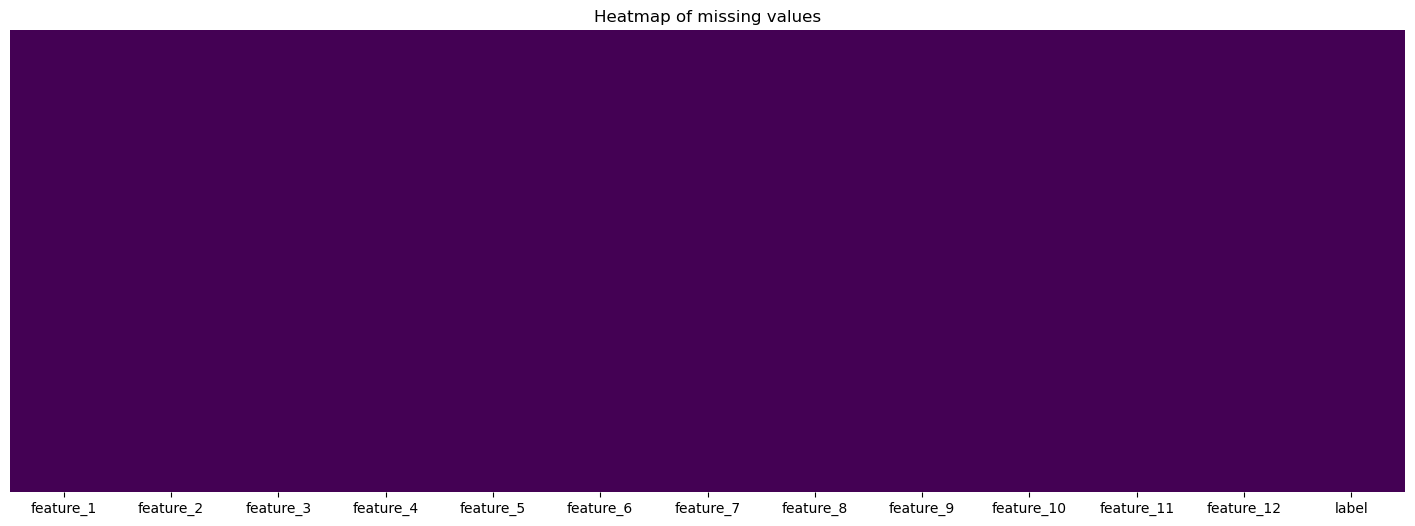

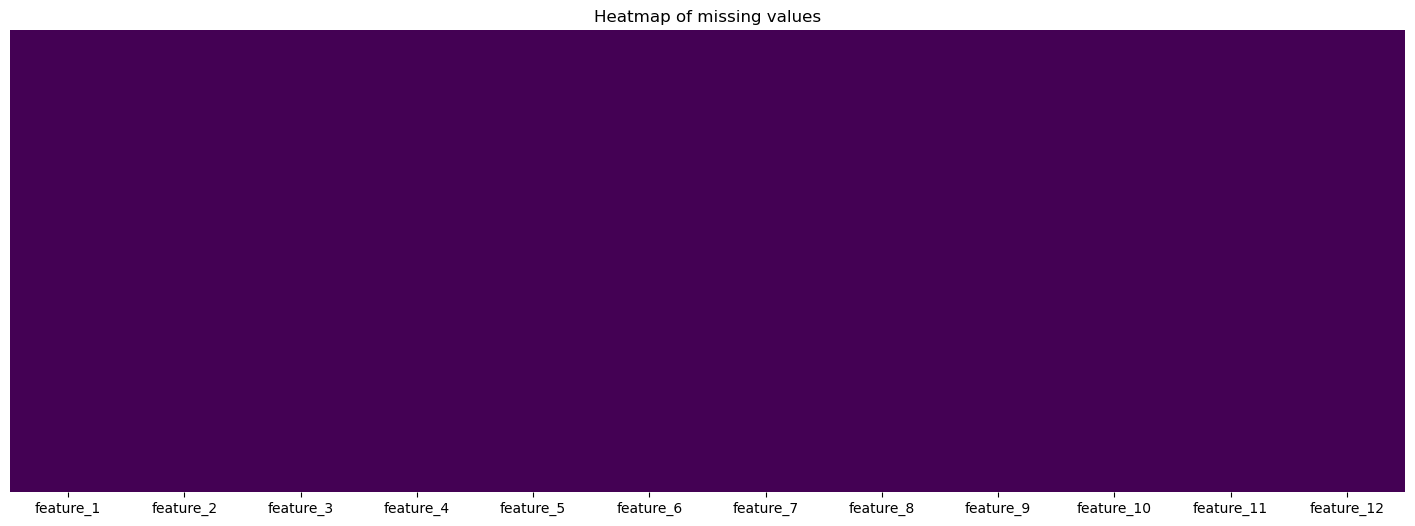

In [9]:
def missing_values(df):
    plt.figure(figsize=(18, 6))
    plt.title('Heatmap of missing values')
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
missing_values(in_sample)
missing_values(out_of_sample)

# Descriptive Statistics

In [10]:
def descriptive_statistics(df):
    statistics = df.describe().T
    print(statistics)
print("In Sample")
descriptive_statistics(in_sample)
print("\n\n Out of Sample")
descriptive_statistics(out_of_sample)

In Sample
             count      mean        std        min       25%       50%  \
feature_1   3249.0  0.492990  0.279765  -0.582578   0.355551  0.545077   
feature_2   3249.0  0.711955  0.192902   0.047787   0.616656  0.754316   
feature_3   3249.0 -0.040309  0.575672  -1.667871  -0.425163 -0.057323   
feature_4   3249.0  0.510519  0.233218   0.000000   0.333952  0.516874   
feature_5   3249.0  0.231747  0.235560  -0.748555   0.080951  0.213430   
feature_6   3249.0  2.883658  4.314279   0.002491   0.659567  1.586655   
feature_7   3249.0 -1.067827  0.441480  -4.927928  -1.260528 -0.992555   
feature_8   3249.0  0.264706  0.115706   0.140496   0.205678  0.232080   
feature_9   3249.0  0.522374  0.340186   0.000000   0.219326  0.503696   
feature_10  3249.0  0.175998  0.412102  -0.968688  -0.079811  0.220646   
feature_11  3249.0  0.231674  1.008607  -2.293849  -0.522903  0.243990   
feature_12  3249.0  0.041305  0.144707  -0.513500  -0.055900  0.052600   
label       3249.0  8.902452

# Features Correlation

In Sample


 Out of Sample


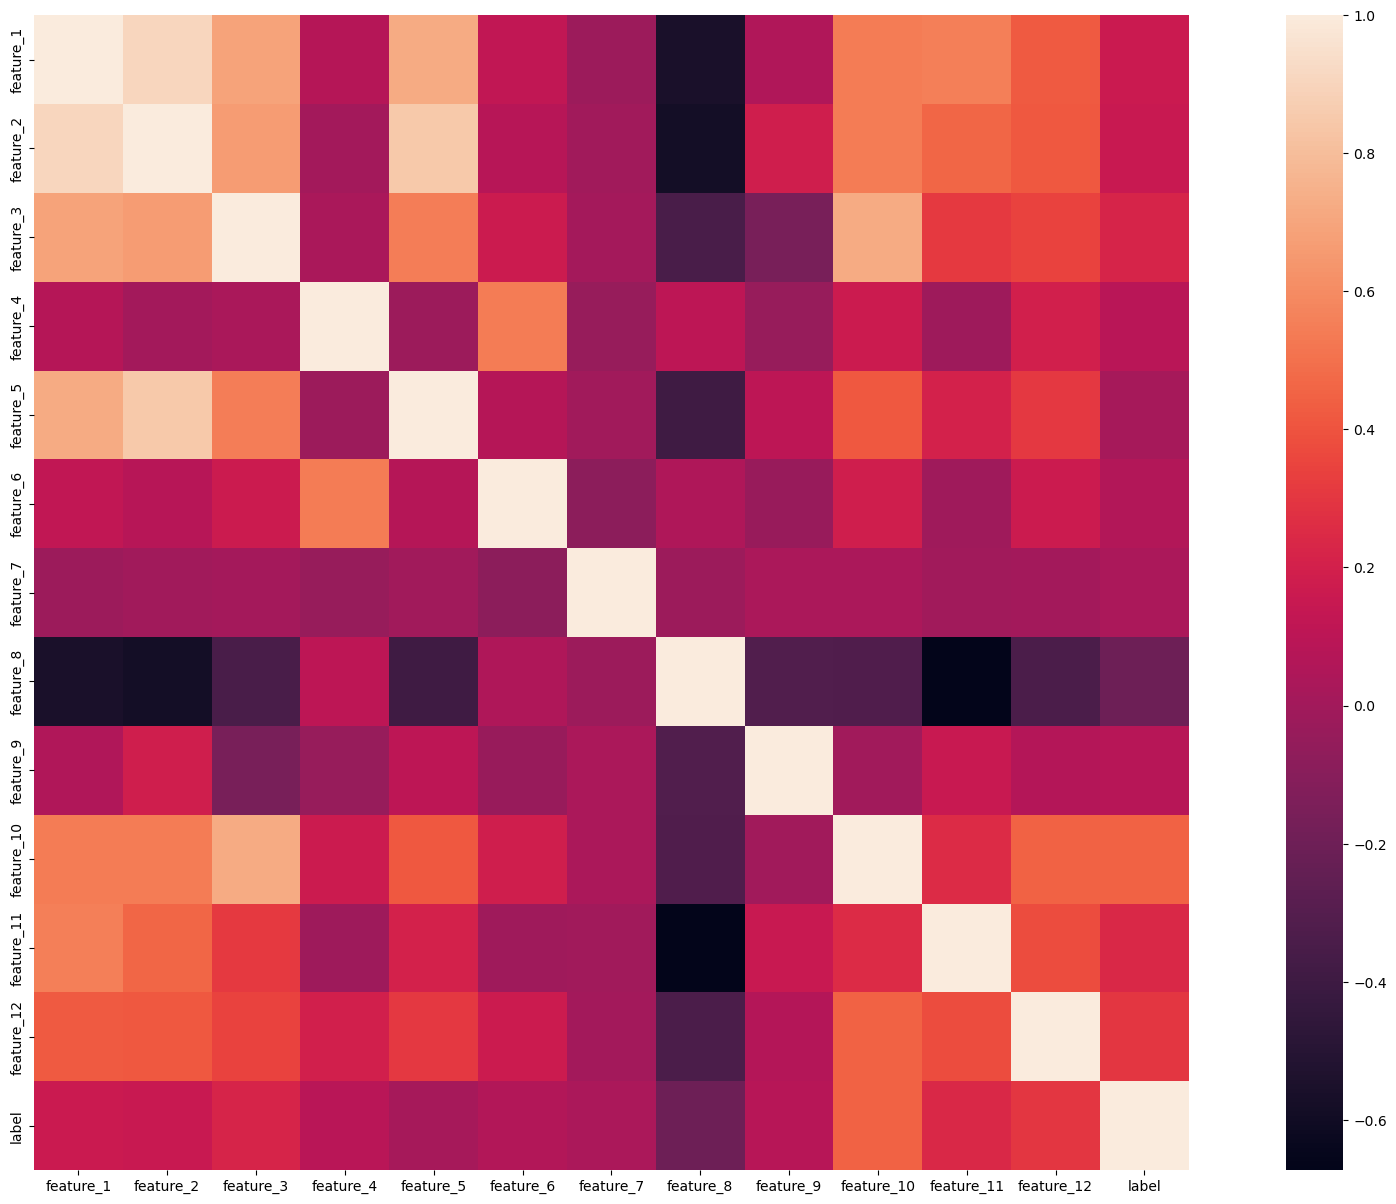

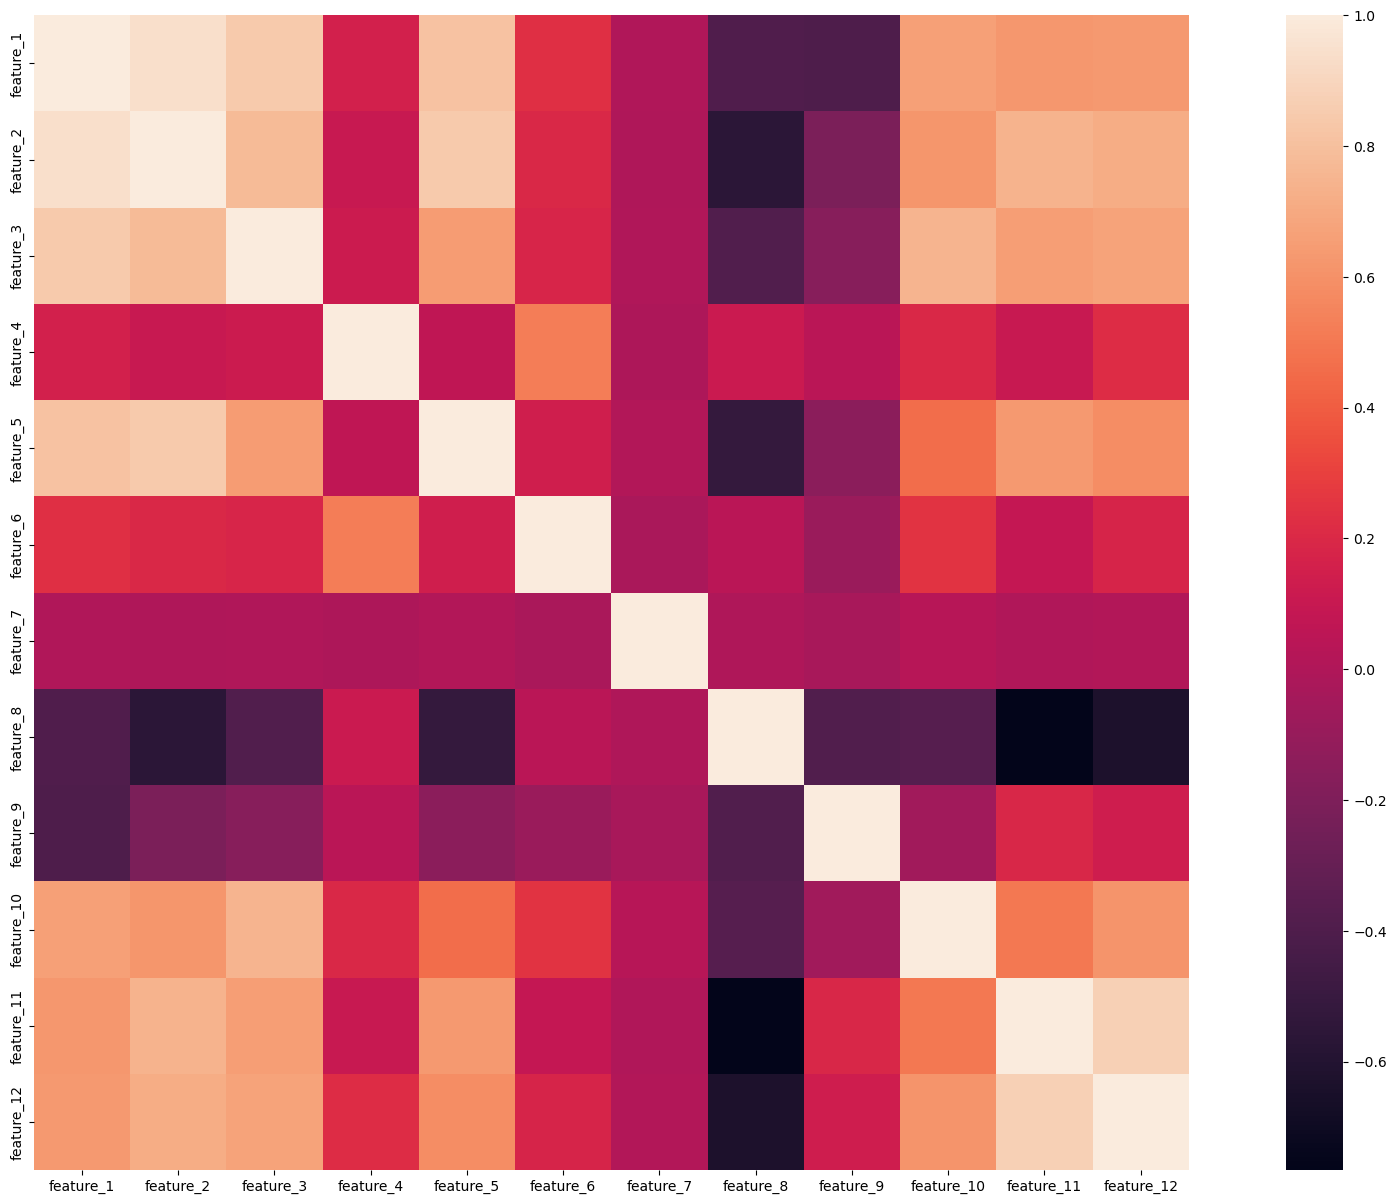

In [11]:
def feature_correlation_heatmap_corrmat(df):
    corrmat=df.corr()
    fig,ax= plt.subplots()
    fig.set_size_inches(25,15)
    sns.heatmap(corrmat,square=True,annot=False, fmt='.2f')
feature_correlation_heatmap_corrmat(in_sample)
feature_correlation_heatmap_corrmat(out_of_sample)

# Normality Test

If the p-value is less than 0.05, you reject the null hypothesis and conclude that the data does not follow a normal distribution.

In [12]:
def shapiro_test(df):
    p_above_05 = 0
    p_below_05 = 0
    for column in df.columns:
        _, p = shapiro(df[column])
        if p > 0.05:
            p_above_05 += 1
        else:
            p_below_05 += 1

    total_columns = len(df.columns)
    prop_above_05 = (p_above_05 / total_columns)* 100
    prop_below_05 = (p_below_05 / total_columns)* 100
    print(f"Proportion of p-values > 0.05: {prop_above_05:.2f}")
    print(f"Proportion of p-values <= 0.05: {prop_below_05:.2f}")
shapiro_test(in_sample)
shapiro_test(out_of_sample)

Proportion of p-values > 0.05: 0.00
Proportion of p-values <= 0.05: 100.00
Proportion of p-values > 0.05: 0.00
Proportion of p-values <= 0.05: 100.00


# Outliers Detection

In [13]:
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
    return df[outliers]
in_sample_outliers=detect_outliers_iqr(in_sample)
out_of_sample_outliers=detect_outliers_iqr(out_of_sample)
print(f"proportion of outliers on in sample is {len(in_sample_outliers)/len(in_sample)}")
print(f"proportion of outliers on out of sample is {len(out_of_sample_outliers)/len(out_of_sample)}")


proportion of outliers on in sample is 0.19883040935672514
proportion of outliers on out of sample is 0.09764918625678119


# Data Normalization

As the features are not following any specific distribution, the scaling process should be made with QuantileTransformer

In [14]:
# Splitting in-sample data into features and labels
X_in_sample = in_sample.drop('label', axis=1)
y_in_sample = in_sample['label']

# Split in-sample data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_in_sample, y_in_sample, test_size=0.2, random_state=42)

# Standardize the features
scaler_x = QuantileTransformer()
X_train_scaled = scaler_x.fit_transform(X_train)
X_val_scaled = scaler_x.transform(X_val)

scaler_y = QuantileTransformer()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).ravel()

# Standardize out of sample
X_out_of_sample_scaled = scaler_x.transform(out_of_sample)

# Models Specifications


### Crucial Parameters
Ridge Regression
* alpha: Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Higher values mean more regularization. alpha=0 corresponds to ordinary least square, solved by a linear regression

Elastic Net
* alpha: The penalty term, combining L1 and L2 regularization.
* l1_ratio: The mix ratio between L1 and L2 regularization. A value of 1 corresponds to Lasso Regression (L1), and 0 corresponds to Ridge Regression (L2).

Decision Tree
*  max_depth: The maximum depth of the tree. Limiting the depth of the tree helps in controlling over-fitting.

Random Forest
*  n_estimators: The number of trees in the forest. More trees can lead to better performance but at the cost of computational expense.
*  max_depth: Similar to the Decision Tree, it controls the depth of each tree.

Gradient Boosting
*  n_estimators: Number of boosting stages to be run. Directly impacts the model complexity.
* learning_rate: Shrinks the contribution of each tree. There's a trade-off between learning rate and n_estimators.

AdaBoost
* n_estimators: The maximum number of estimators at which boosting is terminated.
* learning_rate: Weight applied to each classifier at each boosting iteration.

SVR
* C: Regularization parameter. The strength of the regularization is inversely proportional to C.
* kernel: Specifies the kernel type to be used in the algorithm. It can transform the input space to a higher dimensional space..

MLP Regressor
* hidden_layer_sizes: Defines the number of neurons in the hidden layers. Each element in the tuple represents the size of a layer and the number of layers.
* activation: The activation function for the hidden layers. This determines how the weighted sum of the input is transformed into an output from a node or nodes in a layer.
* solver: The optimization algorithm to use for weight optimization. Different solvers can lead to different performance characteristics and computational efficie nodes in a layer.
  
XGBoost
* n_estimators and max_depth: Similar to Gradient Boosting, they control the number of boosting rounds and the depth of each tree, respectively.

LightGBM
* n_estimators: Refers to the number of boosting stages that will be run. This parameter dictates how many trees will be built by the model. Increasing the number of trees can improve the model's accuracy but might also lead to overfitting if the number is too high.
* learning_rate: Controls the step size at each iteration while optimizing the loss function. A smaller learning rate requires more trees to achieve the same level of accuracy, making the training process slower but potentially more precise.
* num_leaves: Determines the maximum number of leaves in one tree. This is a key parameter that significantly influences the model complexity, with more leaves allowing the model to capture more detailed patterns in the data, but also raising the risk of overfitting.

CatBoost
* iterations: Specifies the number of trees the model should build. Similar to n_estimators in LightGBM, it affects the model's ability to learn from the data. More iterations can lead to a more accurate model but increase the risk of fitting too closely to the training data.
* learning_rate: This parameter influences the speed and quality of the learning process by determining the size of the steps the algorithm takes towards minimizing the loss function.on. A balance is needed, as too high a learning rate can cause the model to converge too quickly to a suboptimal solution, while too low a rate can make the training process unnecessarily long.
* depth: Controls the depth of the trees constructed during the model's learning process. Deeper trees can model more complex relationships in the data but also make the model more complex.

Keras
* layers: The architecture of the neural network, defined as a list where each element represents the number of neurons in a layer.
* activation: Activation function for the neurons. "ReLU" is common for its efficiency.
* epochs: Number of times the learning algorithm will work through the entire training dataset.
* batch_size: Number of samples per gradient update. It impacts the speed and stability of the learning process.

## Wrappers for Deep Learning Models

### Keras DNN

In [15]:
def create_model(layers=[64], activation='relu', optimizer='sgd', input_shape=(12,)):
    model = Sequential()
    model.add(Dense(layers[0], input_dim=input_shape, activation=activation))
    for layer_size in layers[1:]:
        model.add(Dense(layer_size, activation=activation))
    model.add(Dense(1, activation='linear'))
    if optimizer == 'sgd':
        opt = SGD()
    elif optimizer == 'adam':
        opt = Adam()
    else:
        opt = optimizer
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model
    
early_stopping = EarlyStopping(monitor='loss', patience=10)  


### Pytorch DNN

In [16]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1) 

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class PyTorchRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, model_class, input_dim, loss_fn, optimizer_class, optimizer_lr, epochs=100):
        self.model_class = model_class
        self.input_dim = input_dim
        self.loss_fn = loss_fn
        self.optimizer_class = optimizer_class
        self.optimizer_lr = optimizer_lr
        self.epochs = epochs

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.model = self.model_class(input_dim=self.input_dim)
        self.optimizer = self.optimizer_class(self.model.parameters(), lr=self.optimizer_lr)
        # Convert X and y to torch tensors
        X = torch.tensor(X, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.float32)
        
        # Training loop
        for epoch in range(self.epochs):
            # Reset the gradients to zero
            self.optimizer.zero_grad()
            
            # Compute prediction
            y_pred = self.model(X)
            
            # Compute loss
            loss = self.loss_fn(y_pred.squeeze(), y)
            
            # Backpropagation
            loss.backward()
            
            # Update the parameters
            self.optimizer.step()

        # Save the model to the class
        self.fitted_ = True
        return self

    def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self)
        
        # Input validation
        X = check_array(X)
        
        # Convert X to torch tensor
        X = torch.tensor(X, dtype=torch.float32)
        
        # Set model to evaluation mode
        self.model.eval()
        
        with torch.no_grad():
            y_pred = self.model(X)
            
        return y_pred.numpy()
    
    def score(self, X, y):
        # Override with appropriate scoring metric
        predictions = self.predict(X)
        return r2_score(y, predictions)

## Models Testing Framework

In [17]:
# Model pipelines
base_models = {
    'Ridge Regression': Ridge(),
    'Elastic Net': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'SVR': SVR(),
    'MLP Regressor': MLPRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(),
    'Keras' : KerasRegressor(model=create_model, verbose=0, layers=[64], activation='relu', 
                                     optimizer='sgd', input_shape=X_train_scaled.shape[1], callbacks=[early_stopping]),
    'PyTorch NN': PyTorchRegressor(model_class=SimpleNN, input_dim=X_train_scaled.shape[1],loss_fn=nn.MSELoss(), optimizer_class=Adam, 
                           optimizer_lr=0.001)
}

# Hyperparameters for tuning 
base_param_grids = {
    'Ridge Regression': {'alpha': [0.1, 1.0, 5.0]},
    'Elastic Net': {'alpha': [0.1, 1.0, 5.0], 'l1_ratio': [0.1, 0.5, 0.9]},
    'Decision Tree': {'max_depth': [None, 10, 20]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [None, 10]},
    'Gradient Boosting':{'n_estimators':[500, 1500] , 'learning_rate': [0.01, 0.1]},
    'AdaBoost': {'n_estimators': [200,1000], 'learning_rate': [0.01, 0.1]},
    'SVR': {'C': [1, 10, 100], 'kernel': ['rbf', 'poly']},
    'MLP Regressor': {'hidden_layer_sizes': [(random.randint(400, 600), random.randint(300, 500)) for i in range(0, 3)], 
                  'activation': ['relu', 'tanh'], 'solver':['adam', 'sgd']},
    'XGBoost': {'n_estimators': [500, 1000], 'max_depth': [3, 6]},
    'LightGBM': {'n_estimators': [200, 500], 'learning_rate': [0.01, 0.1], 'num_leaves': [30,80], 'verbose': [-1]},
    'CatBoost': {'iterations': [300, 500], 'learning_rate': [0.05, 0.1], 'depth': [6, 8], 'logging_level': ['Silent']},
    'Keras': {'layers': [[64,64], [64, 64, 64]], 'activation':['relu', 'tanh'],'epochs': [1000, 1500], 'batch_size': [50, 100]},
    'PyTorch NN': {'epochs': [500, 1000], 'optimizer_class': [torch.optim.Adam, torch.optim.SGD], 'optimizer_lr': [0.001, 0.01, 0.1]}
}

# Initialize RandomizedSearch Params
random_search_params = {
    'cv': 3,            
    'verbose': 1,       
    'n_jobs': -1,
    'random_state' : 42
}

# Cross-Validation and Hyperparameters Tuning without Feature Selection

In [18]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [19]:
def tuning_without_feat_select(models_selected, param_grids_selected, n_iter=100):
    cv_results = {}
    for name, model in models_selected.items():
        print(f"Tuning {name}")
        # Perform random search for hyperparameter tuning
        random_search = RandomizedSearchCV(model, param_distributions=param_grids_selected[name], n_iter=n_iter, **random_search_params)
        random_search.fit(X_train_scaled, y_train_scaled)
    
        # Use the best estimator found by RandomizedSearchCV
        best_model = random_search.best_estimator_
        y_pred = best_model.predict(X_val_scaled)

        mse = mean_squared_error(y_val_scaled, y_pred)
        r2 = r2_score(y_val_scaled, y_pred)
        mae = mean_absolute_error(y_val_scaled, y_pred)
        mape = mean_absolute_percentage_error(y_val_scaled, y_pred)
        
        cv_results[name] = {
            'Validation MSE': mse, 
            'Validation R2': r2,
            'Validation MAE': mae, 
            'Validation MAPE': mape,
            'Best Params': random_search.best_params_
        }
    return cv_results
        
df_tuning_without_feat_select= (pd.DataFrame(tuning_without_feat_select(base_models, base_param_grids)).T).\
                                sort_values(by='Validation R2', ascending=False)
print(f"\n\n {(df_tuning_without_feat_select)}")

Tuning Ridge Regression
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Tuning Elastic Net
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Tuning Decision Tree
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Tuning Random Forest
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Tuning Gradient Boosting
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Tuning AdaBoost
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Tuning SVR
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Tuning MLP Regressor
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Tuning XGBoost
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Tuning LightGBM
Fitting 3 folds for each of 8 candidates, totalling 24 fits


  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Tuning CatBoost
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Tuning Keras
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Tuning PyTorch NN
Fitting 3 folds for each of 12 candidates, totalling 36 fits


                   Validation MSE Validation R2 Validation MAE Validation MAPE  \
CatBoost           0.004968       0.94335       0.048306       40.394784        
LightGBM           0.006513       0.925729      0.055763       41.790539        
XGBoost            0.009102       0.8962        0.065839       42.440882        
MLP Regressor      0.00948        0.891892      0.072893       40.754454        
Random Forest      0.01039        0.881512      0.06865        52.97188         
Gradient Boosting  0.011117       0.87322       0.076113       68.502564        
SVR                0.01486        0.830535      0.09385        57.797094        
PyTorch NN         0.022546       0.742888      0.113546       280.208039       
Decision Tree      0.022765       0.740

# Cross-Validation and Hyperparameters Tuning with Feature Selection

## Feature Selection

In [20]:
def feature_importance_regression(model, model_name, X_actual, X_train, y_train):
    features = X_actual.columns

    # Check if model supports direct feature importance attribute
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        import_sort = np.argsort(-importances)
        indices = import_sort[:12]
        plt.figure(figsize=(10, 6))
        plt.title(' {} Feature Importances (Mean Decrease in Impurity)'.format(model_name))
        plt.barh(features[indices], importances[indices], align='center')
        plt.xlabel('Relative Importance')
        # plt.show()
    else:
        print(f"{model_name} does not support direct feature importances_. Skipping MDI plot.")

    # Permutation feature importance focused on prediction accuracy (using R² score)
    plt.figure(figsize=(10, 6))
    perm_importance = permutation_importance(model, X_train, y_train,
                                             scoring='r2', n_repeats=10, random_state=42)
    perm_imp_mean = perm_importance.importances_mean
    sorted_idx = np.argsort(-perm_imp_mean)[:12]
    plt.title(' {} Feature Importances (Permutation R²)'.format(model_name))
    plt.barh(features[sorted_idx], perm_imp_mean[sorted_idx], align='center')
    plt.xlabel("Permutation Importances (R² Score)")
    # plt.show()

    # Return both MDI importances if available and permutation importance means
    if hasattr(model, 'feature_importances_'):
        return importances, perm_imp_mean
    else:
        return None, perm_imp_mean

## Tuning

Tuning Ridge Regression
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Ridge Regression does not support direct feature importances_. Skipping MDI plot.
Tuning Elastic Net
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Elastic Net does not support direct feature importances_. Skipping MDI plot.
Tuning Decision Tree
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Tuning Random Forest
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Tuning Gradient Boosting
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Tuning AdaBoost
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Tuning SVR
Fitting 3 folds for each of 6 candidates, totalling 18 fits
SVR does not support direct feature importances_. Skipping MDI plot.
Tuning MLP Regressor
Fitting 3 folds for each of 12 candidates, totalling 36 fits
MLP Regressor does not support direct feature importances_. Skipping MDI plot.
Tuning XGBoost
Fitting 3 folds for each of 4 candidates,

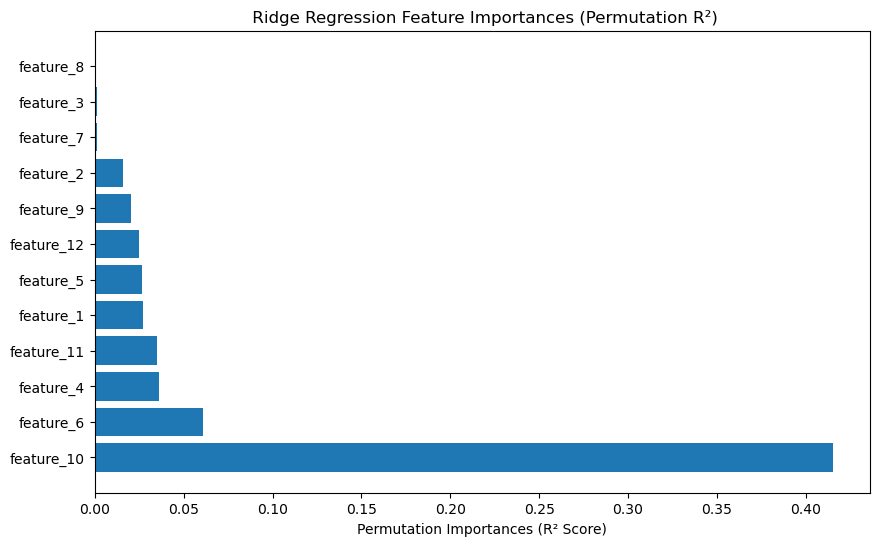

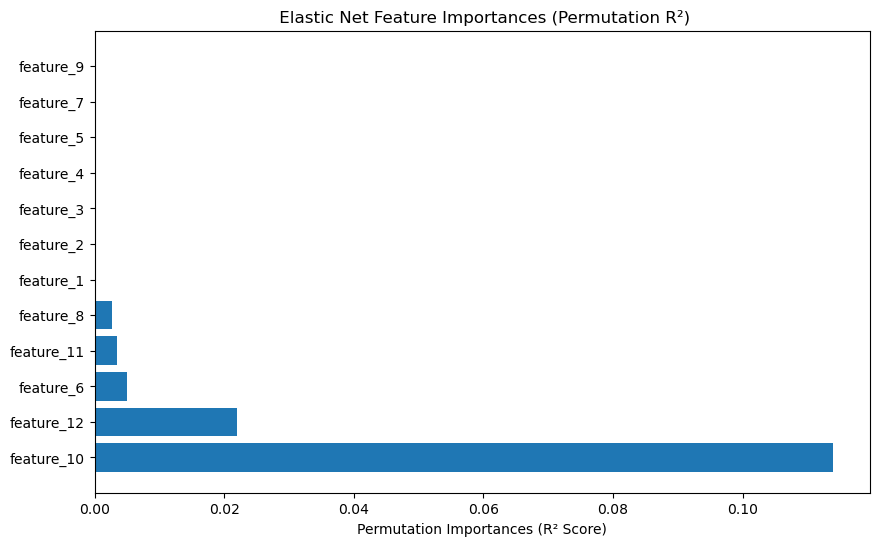

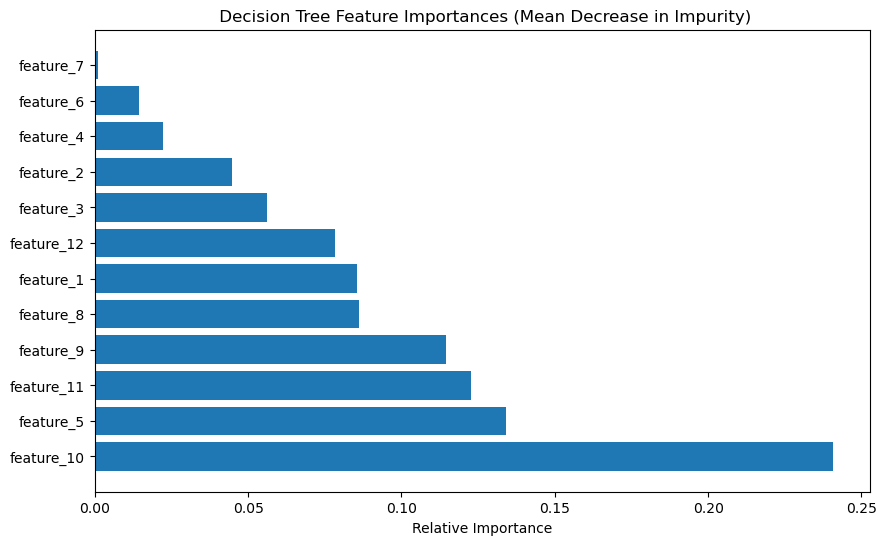

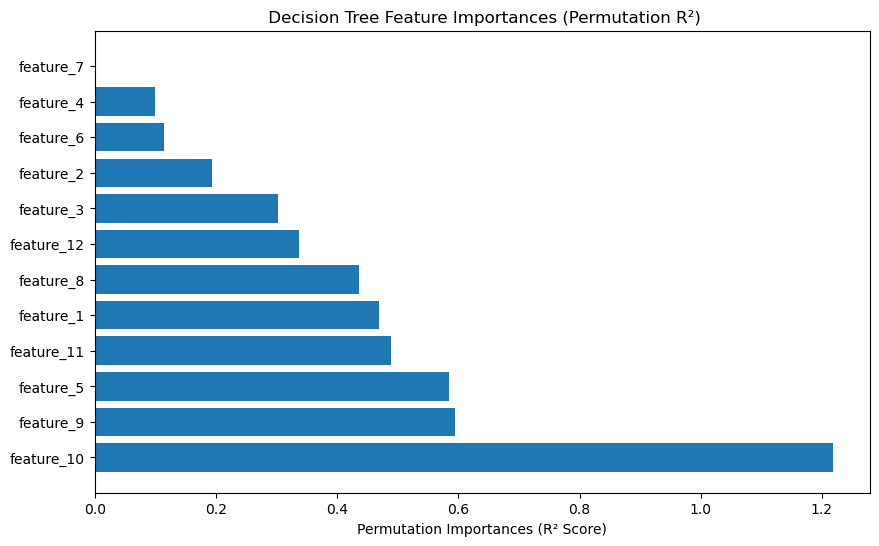

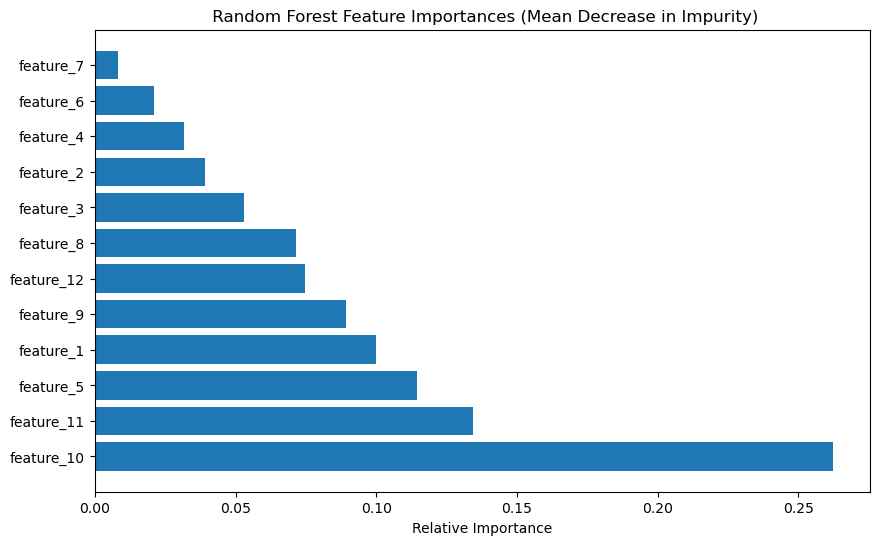

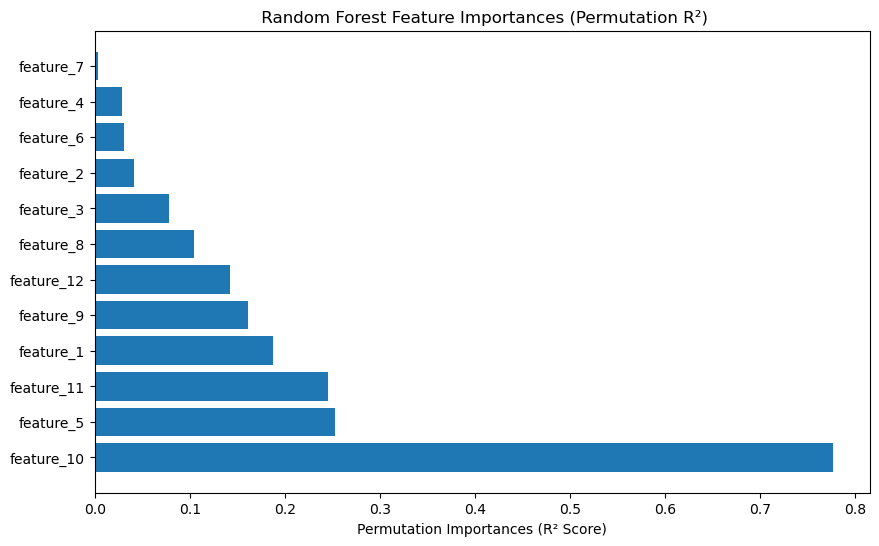

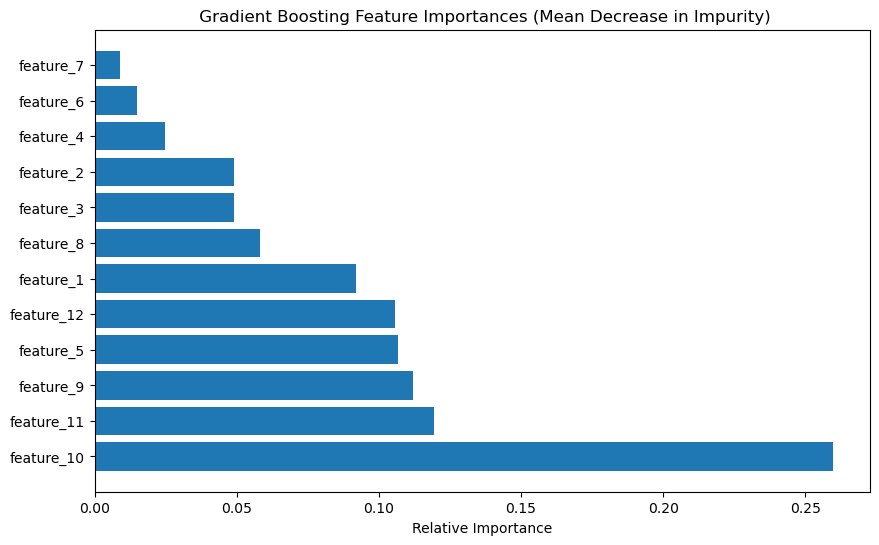

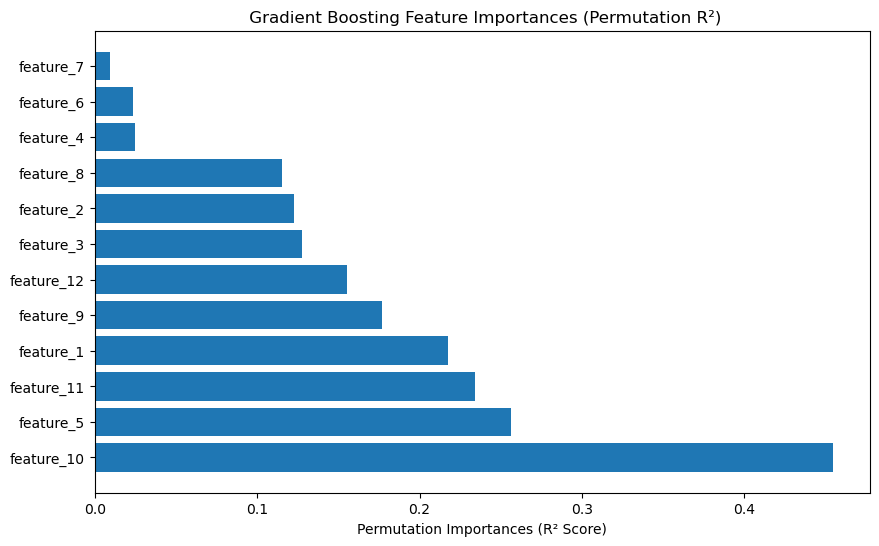

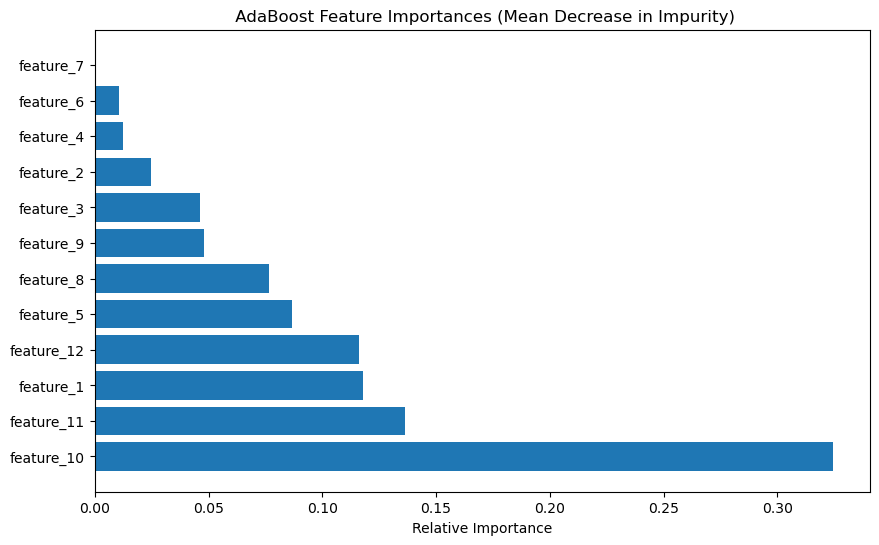

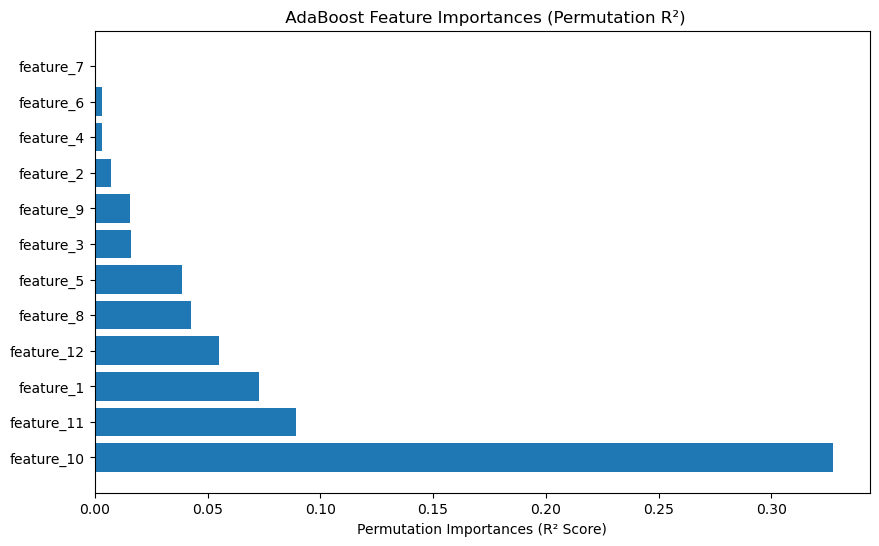

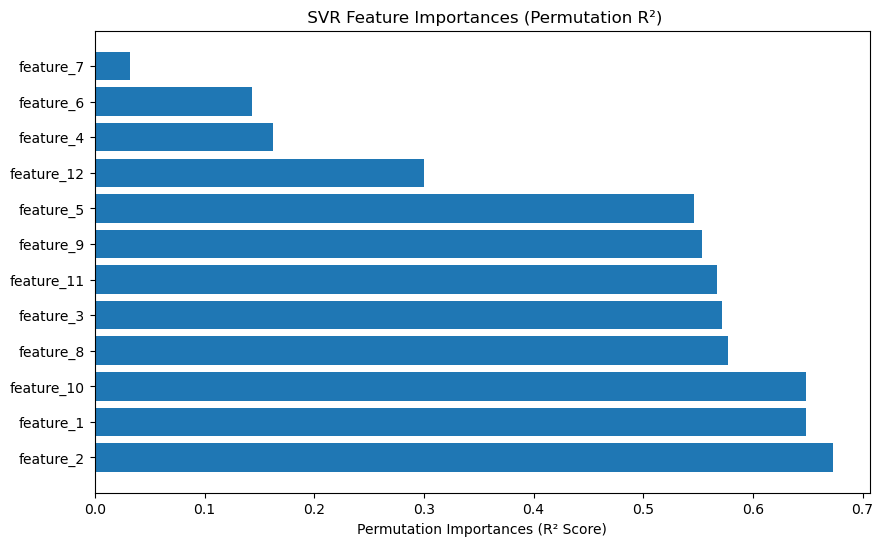

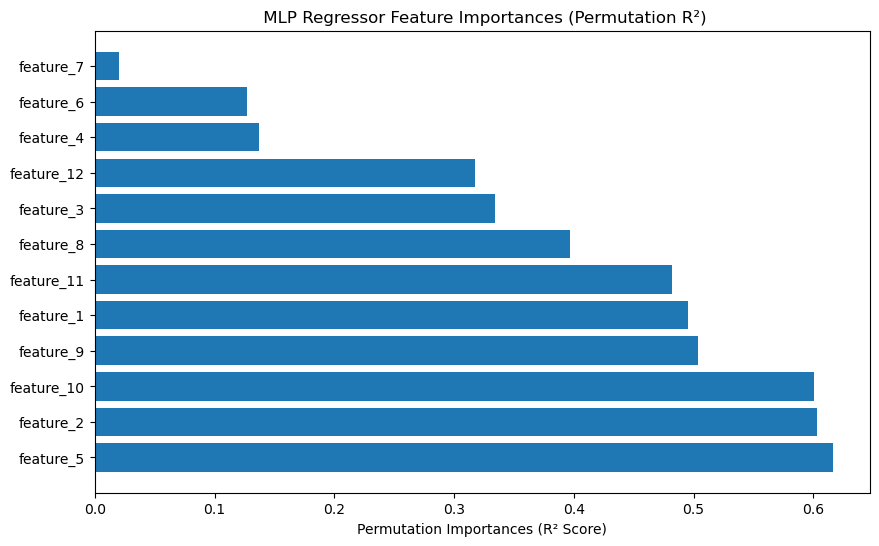

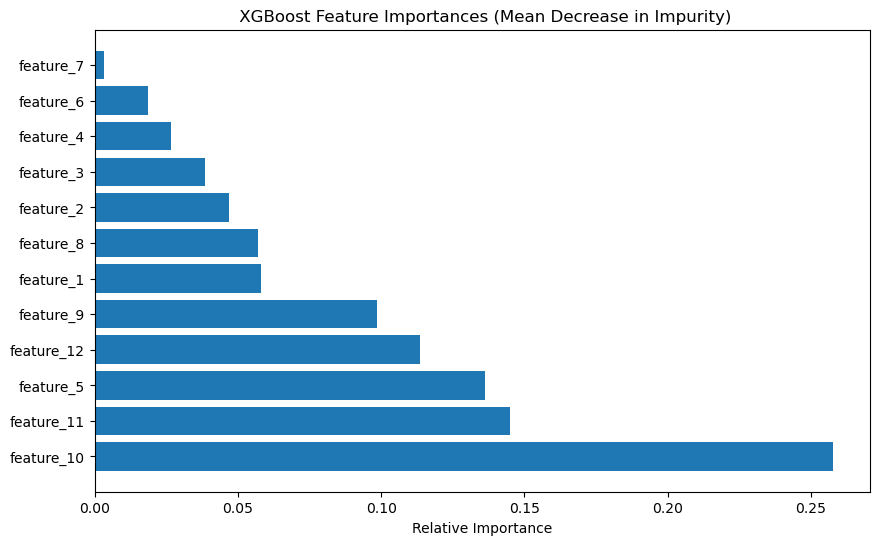

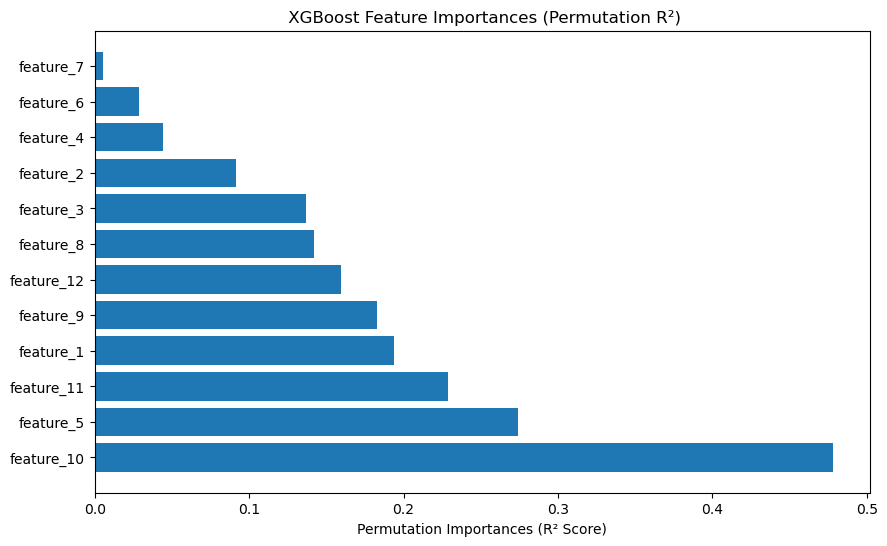

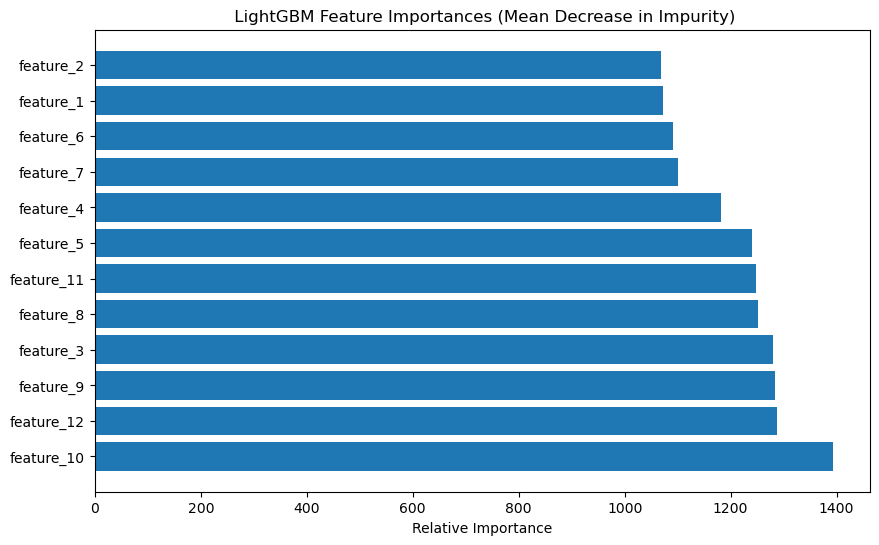

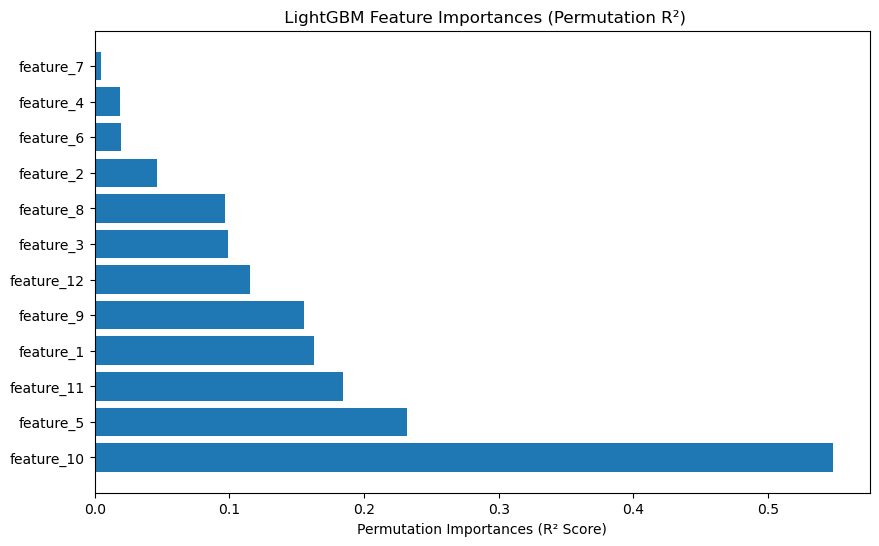

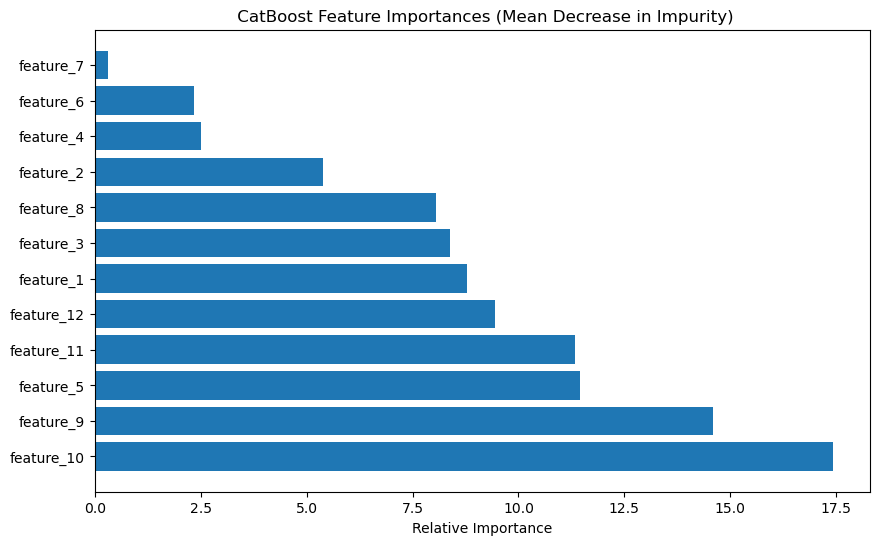

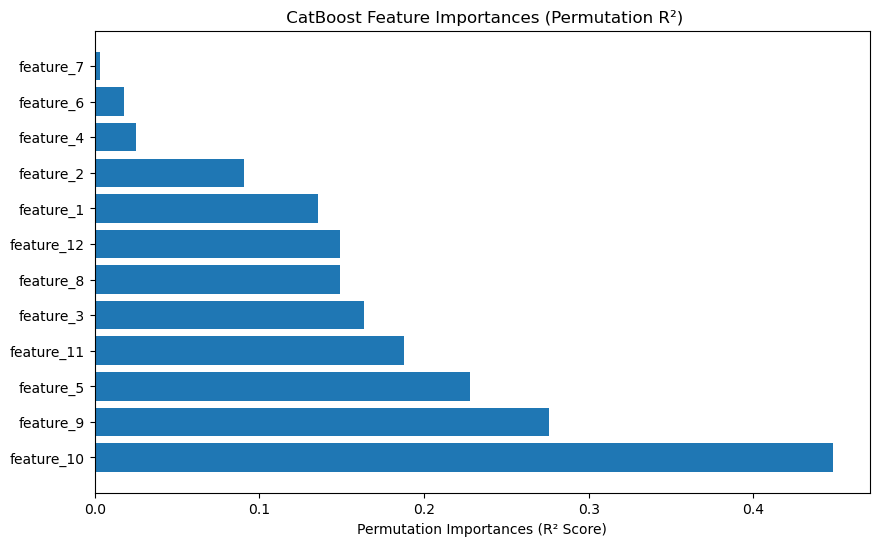

In [21]:
def tuning_with_feat_select(models_selected, param_grids_selected, n_iter=100):
    cv_results_feat_select = {}
    for name, model in models_selected.items():
        if name not in ['Keras', 'PyTorch NN']:
            print(f"Tuning {name}")
            # Perform random search for hyperparameter tuning
            random_search = RandomizedSearchCV(model, param_distributions=param_grids_selected[name], n_iter=n_iter, **random_search_params)
            random_search.fit(X_train_scaled, y_train_scaled)
        
            # Use the best estimator found by RandomizedSearchCV
            best_model = random_search.best_estimator_
            importances, perm_imp_mean = feature_importance_regression(best_model, name, pd.DataFrame(X_train_scaled,
                                                                    columns=X_in_sample.columns),X_train_scaled, y_train_scaled)
            # Selecting features based on permutation importance (75% of features)
            selected_idx = np.where(perm_imp_mean>np.percentile(perm_imp_mean, 25))
            selected_features=X_in_sample.columns[selected_idx]
        
            # Rerun the model with selected features
            X_train_selected = np.column_stack([X_train_scaled[:, i] for i in selected_idx])
            X_val_selected = np.column_stack([X_val_scaled[:, i] for i in selected_idx])
            best_model.fit(X_train_selected, y_train_scaled)  # Retraining using only selected features
            y_pred_selected = best_model.predict(X_val_selected)
        
            mse_selected = mean_squared_error(y_val_scaled, y_pred_selected)
            r2_selected = r2_score(y_val_scaled, y_pred_selected)
            mae_selected = mean_absolute_error(y_val_scaled, y_pred_selected)
            mape_selected = mean_absolute_percentage_error(y_val_scaled, y_pred_selected)
            # Store results
            cv_results_feat_select[f"{name} Feat Select"] = {
                'Validation MSE': mse_selected,
                'Validation R2': r2_selected,
                'Validation MAE': mae_selected,
                'Validation MAPE': mape_selected,
                'Best Params': random_search.best_params_
            }
    return cv_results_feat_select
        
df_tuning_with_feat_select=(pd.DataFrame(tuning_with_feat_select(base_models, base_param_grids)).T).\
                            sort_values(by='Validation R2', ascending=False)
print(f"\n\n {df_tuning_with_feat_select}")

# Select Best Models

In [22]:
df_tuning_all=pd.concat([df_tuning_without_feat_select, df_tuning_with_feat_select]).sort_values(by='Validation R2', ascending=False)
df_selected_models=df_tuning_all[df_tuning_all['Validation R2']>0.9]
print(df_selected_models)

                          Validation MSE Validation R2 Validation MAE  \
CatBoost Feat Select       0.003989       0.954512      0.042451        
CatBoost                   0.004968       0.94335       0.048306        
LightGBM Feat Select       0.00562        0.935911      0.050825        
LightGBM                   0.006513       0.925729      0.055763        
XGBoost Feat Select        0.007527       0.914166      0.058192        
Random Forest Feat Select  0.008595       0.90198       0.060674        

                          Validation MAPE  \
CatBoost Feat Select       37.497827        
CatBoost                   40.394784        
LightGBM Feat Select       37.911877        
LightGBM                   41.790539        
XGBoost Feat Select        43.316855        
Random Forest Feat Select  51.401306        

                                                                                                Best Params  
CatBoost Feat Select       {'logging_level': 'Silent', 'learni

# Run Extended Tuning on Selected Models

The selected_param_grids should reflect the models retained in df_selected_models

Tuning CatBoost
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Tuning CatBoost
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Tuning LightGBM
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Tuning LightGBM
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Tuning XGBoost
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Tuning Random Forest
Fitting 3 folds for each of 5 candidates, totalling 15 fits


                           Validation MSE Validation R2 Validation MAE  \
CatBoost Feat Select       0.004258       0.951438      0.043426        
LightGBM Feat Select       0.005109       0.941734      0.049001        
CatBoost                   0.005146       0.941321      0.048853        
XGBoost Feat Select        0.006059       0.930906      0.051309        
LightGBM                   0.006588       0.924866      0.057572        
Random Forest Feat Select  0.008631       0.90157       0.061188        

                  

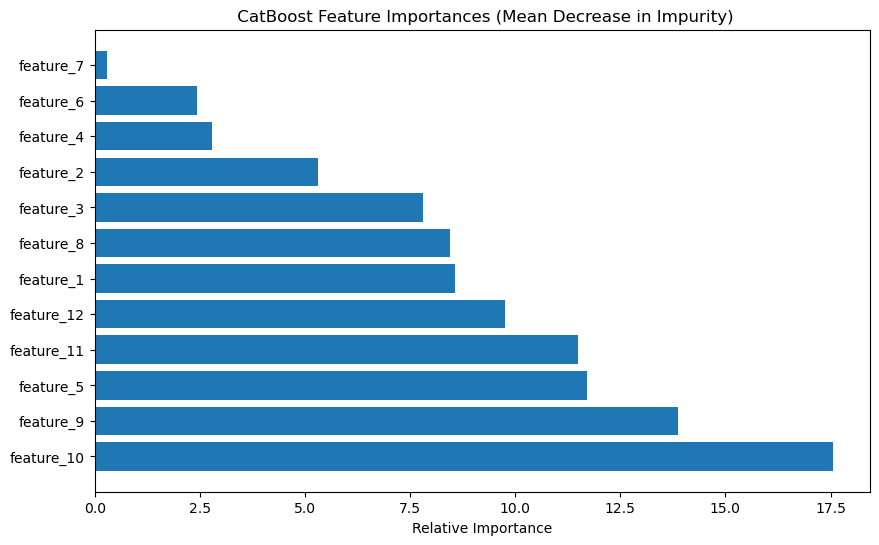

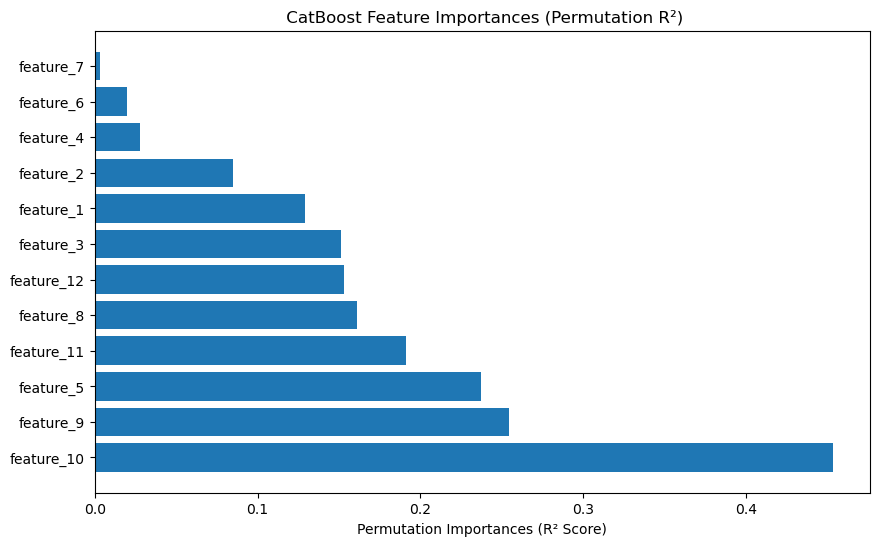

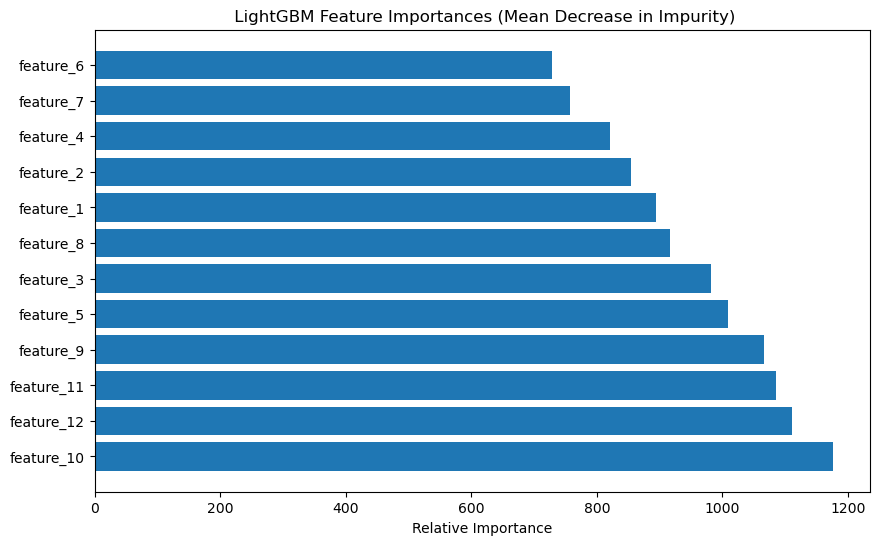

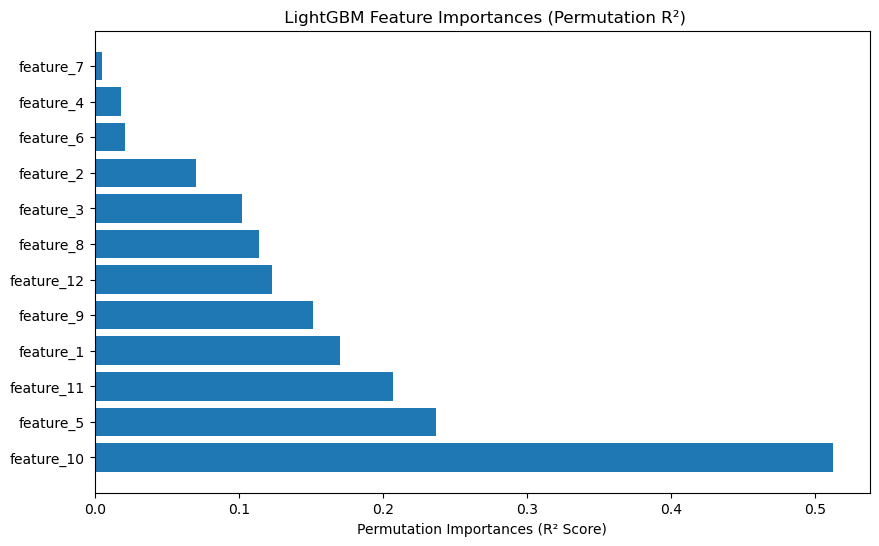

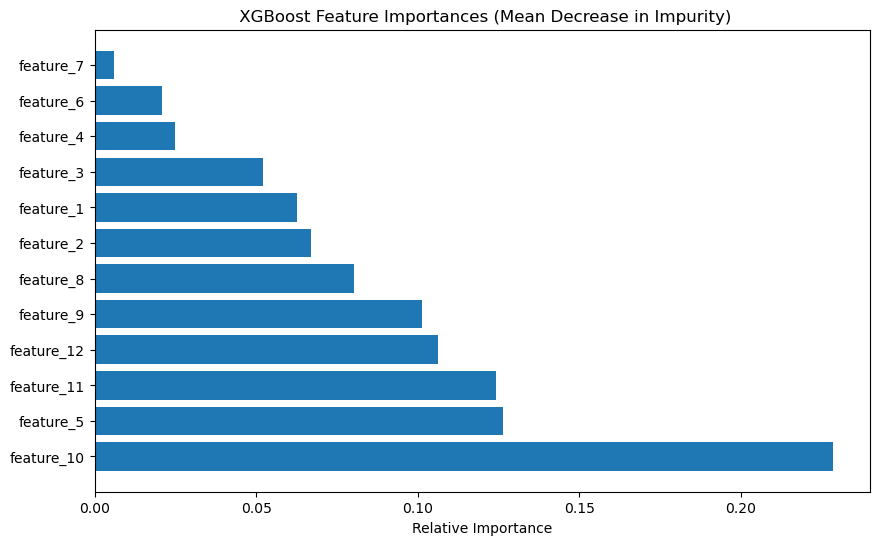

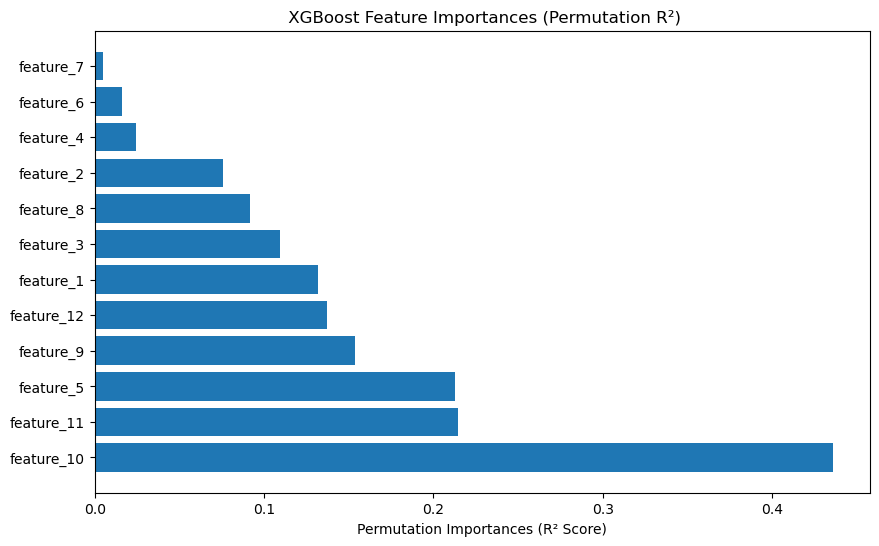

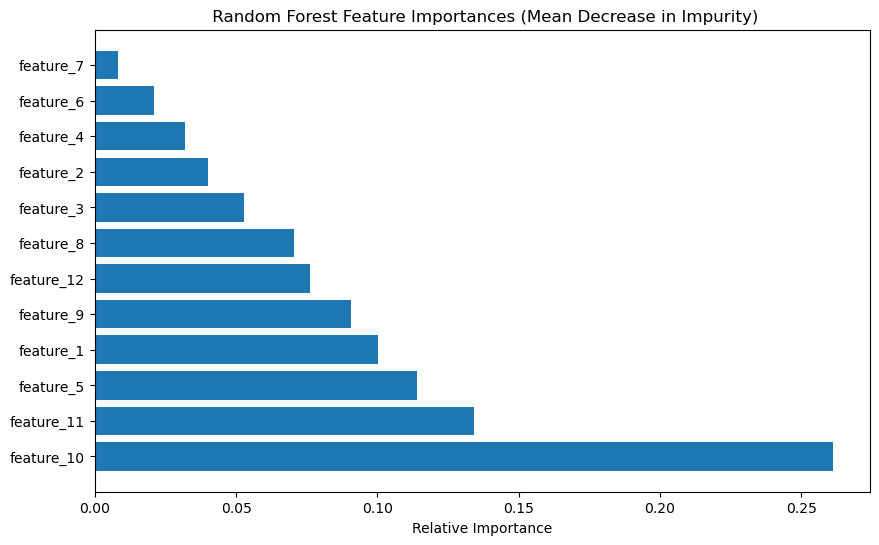

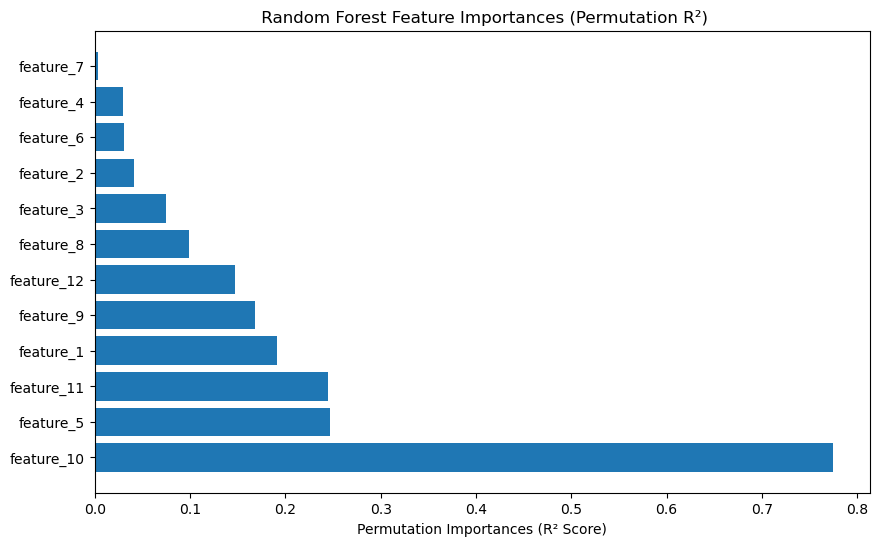

In [24]:
selected_param_grids = {
    'XGBoost': {'n_estimators': np.arange(800,1300,100), 'max_depth': np.arange(3, 6, 1),  'eta':np.arange(0, 0.3, 0.1), 'subsample':np.arange(0.6, 1.1, 0.1), 
    'colsample_bytree':np.arange(0.7,1.1, 0.1)},
    'Keras': {'layers': [[32,32,32],[48,48,48], [64,64,64], [80,80,80], [96,96,96], [112,112, 112], [128,128,128]],
              'activation':['tanh'],'epochs': np.arange(800,1300,100), 'batch_size': np.arange(40,70,10)},
    'LightGBM': {'n_estimators': np.arange(400,700,100), 'learning_rate': np.arange(0.09, 0.12,  0.01), 'num_leaves': np.arange(20, 50, 10), 'verbose': [-1]},
    'CatBoost': {'iterations': np.arange(400,700,100) ,'learning_rate': np.arange(0.09, 0.12,  0.01), 'depth': np.arange(7,10,1), 'logging_level': ['Silent']},
    'MLP Regressor': {'hidden_layer_sizes': [[500,450],[550, 500], [450,400]], 
              'activation': ['relu'], 'solver':['adam']},
    'Random Forest': {'n_estimators': np.arange(180, 230, 10), 'max_depth': [None]}
}

dict_res_selected_models={}
for name in df_selected_models.index:
    # Feature Selection Model Tuning
    if "Feat Select" in name:
        name_base=name.split(" Feat")[0]
        dict_res_selected_models[name]=(pd.Series(tuning_with_feat_select({name_base : base_models[name_base]}, {name_base:selected_param_grids[name_base]})[name]))
    # Simple Model Tuning
    else:
        dict_res_selected_models[name]=(pd.Series(tuning_without_feat_select({name : base_models[name]}, {name: selected_param_grids[name]})[name]))
# Get results in df format
df_res_selected_models=(pd.DataFrame(dict_res_selected_models).T).sort_values(by='Validation R2', ascending=False)
print(f"\n\n {df_res_selected_models}")

# Out of Sample Evaluation

In [25]:
def out_of_sample_pred(df):
    # Initialize a dictionary to store predictions
    predictions = {}
    # Loop through the top models
    for name in df.index:
        # Retrieve the model and its best parameters
        best_params = df.loc[name,'Best Params']
        # Use names without feature select to find models
        name_base=name.split(" Feat")[0]
        if name_base=='CatBoost':
            model = CatBoostRegressor(**best_params)
        else:
            model = base_models[name_base].set_params(**best_params) 
        
        # Fit model on the combined training and validation set
        model.fit(np.vstack((X_train_scaled, X_val_scaled)), np.concatenate((y_train, y_val)))
        
        # Predict on out-of-sample data
        predictions[name] = model.predict(X_out_of_sample_scaled)

    predictions_df=pd.DataFrame(predictions)
    return predictions_df
    
pred_df=out_of_sample_pred(df_res_selected_models)

# Reporting and Visualisation

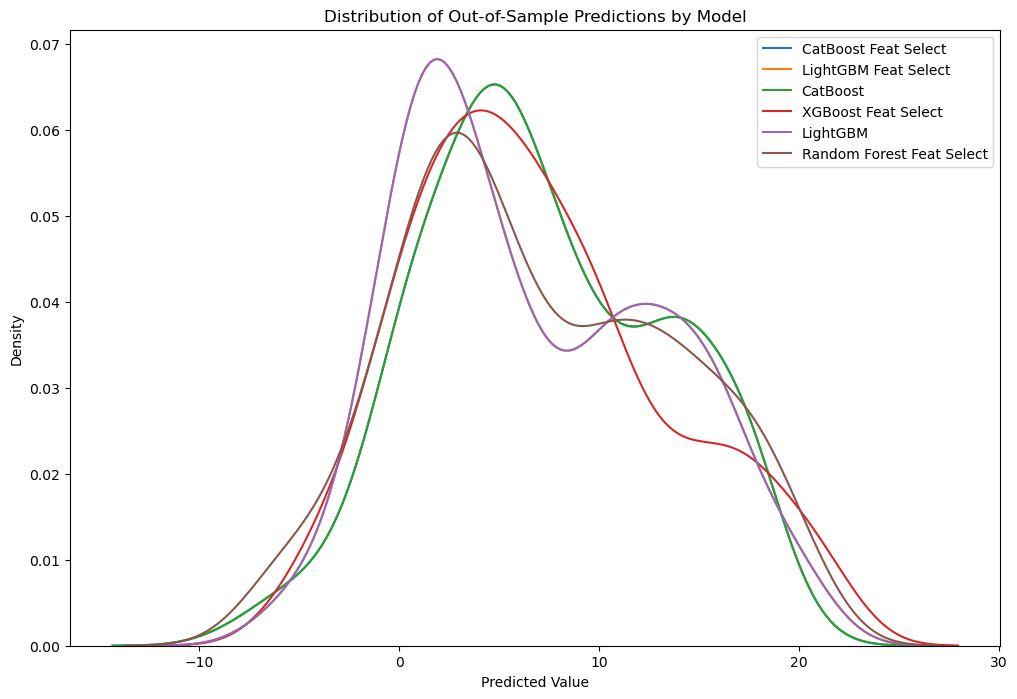

In [26]:
def pred_visu(predictions_df):
    plt.figure(figsize=(12, 8))
    
    # Plotting distributions of predictions
    for column in predictions_df.columns:
        sns.distplot(predictions_df[column], label=column, hist=False, kde=True)
    
    plt.title('Distribution of Out-of-Sample Predictions by Model')
    plt.xlabel('Predicted Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
pred_visu(pred_df)

In [27]:
# Final dataframe with predictions from the best model
pd.set_option('display.max_rows', None)
print(pred_df[df_res_selected_models.head(1).index])

     CatBoost Feat Select
0    0.062116            
1   -2.634486            
2   -1.198726            
3   -0.548421            
4    1.982636            
5    0.533202            
6    1.187306            
7    1.504645            
8    1.516367            
9    0.943186            
10   0.943186            
11  -0.875886            
12  -1.200303            
13  -3.863604            
14  -9.140266            
15  -7.863280            
16  -5.503521            
17  -3.581791            
18  -4.512718            
19  -6.173164            
20  -5.837822            
21  -5.781250            
22  -3.093076            
23  -7.227374            
24  -6.272748            
25  -7.864235            
26  -6.449916            
27  -5.618084            
28  -3.181368            
29  -3.398042            
30  -2.402610            
31  -2.740794            
32  -4.908168            
33  -3.230959            
34  -1.280772            
35  -1.280772            
36  -0.018540            
37   1.33369

In [28]:
descriptive_statistics(pd.DataFrame(pred_df[df_res_selected_models.head(1).index]))

                      count      mean       std       min       25%      50%  \
CatBoost Feat Select  553.0  7.116474  6.125629 -9.140266  2.707928  6.32194   

                            75%       max  
CatBoost Feat Select  12.129946  20.62568  


In [29]:
descriptive_statistics(pd.DataFrame(in_sample['label']))

        count      mean        std        min       25%       50%        75%  \
label  3249.0  8.902452  11.300085 -18.045486  1.805333  7.891016  16.546285   

             max  
label  47.989549  


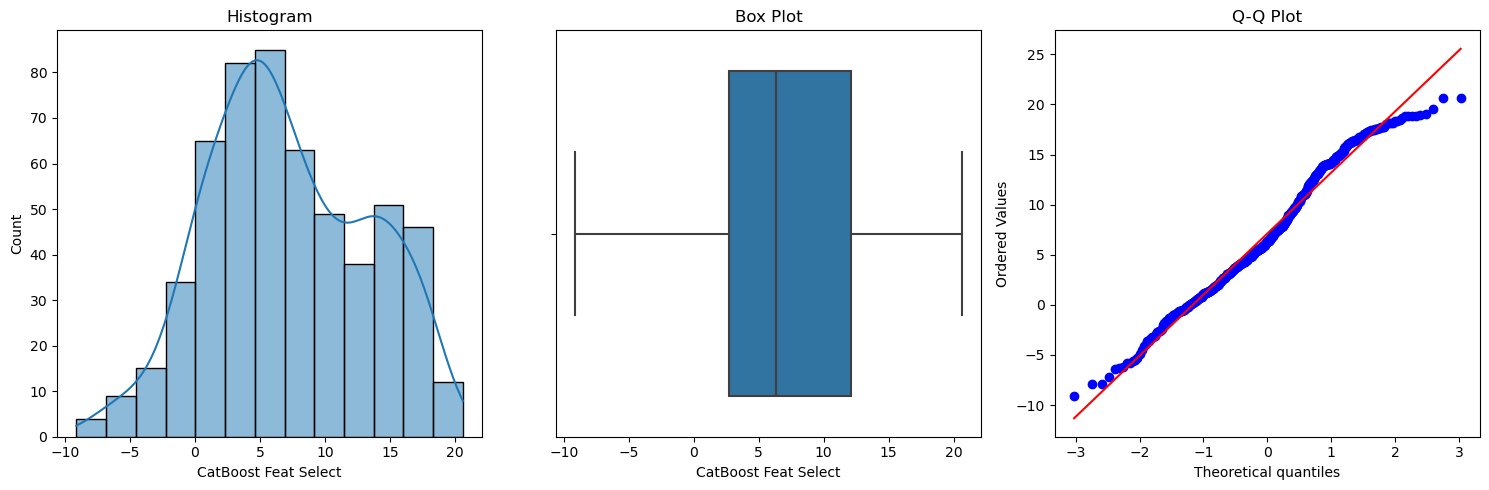

In [30]:
visual_inspection(pd.DataFrame(pred_df[df_res_selected_models.head(1).index]))

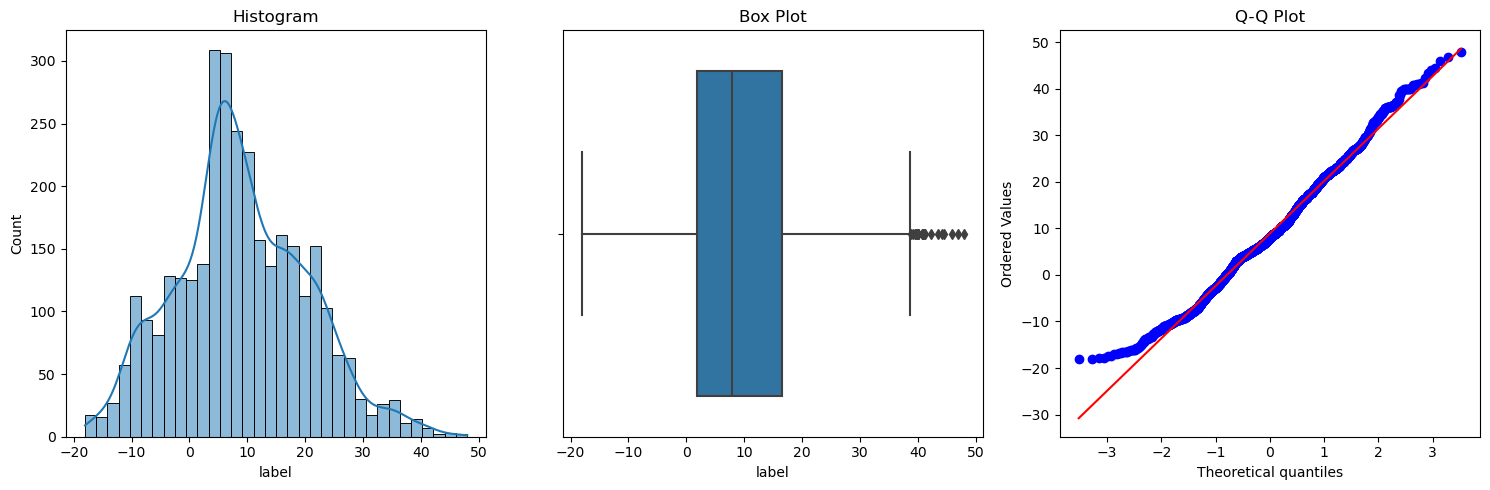

In [31]:
visual_inspection(pd.DataFrame(in_sample['label']))

End timer

In [32]:
end_time=time.time()
elapsed_time_seconds = end_time - start_time
elapsed_minutes = int(elapsed_time_seconds // 60)
elapsed_seconds = int(elapsed_time_seconds % 60)
print(f"Elapsed time: {elapsed_minutes} minute(s) and {elapsed_seconds} second(s)")

Elapsed time: 75 minute(s) and 16 second(s)
